# 09 LFTS Machine Learning, K-means clustering with Albums and States (CF Task 6.5)

# Contents 
*Note: Used the PCA technique to standardize and reduce dimensionality, then combine those results with K-means clustering 


# Import libraries and data   
# Review and clean both dfs
- Basic cleaning
- Visualize relationships of focus

# 01. Album based dataframe
## 1A. Data preprocessing
- Numerical df
- Standardization
- Reduce dimensionality
- PCA explained features
- Perform Principal Components Analysis (PCA)

## 1B. Incorporate PCA with K-means
- Elbow technique
- Implement K-means

## 1C. Analyze results
- Visualize K-means results
- Plot clusters with variables
- Compare cluster stats

## 1D. Key observations


# 02. State based dataframe
## 2A. Data preprocessing
- Numerical df
- Standardization
- Reduce dimensionality
- PCA explained features
- Perform Principal Components Analysis (PCA)

## 2B. Incorporate PCA with K-means
- Elbow technique
- Implement K-means

## 2C. Analyze results
- Visualize K-means results
- Plot clusters with variables
- Compare cluster stats

## 2D. Key observations

# Revisit correlations after finer grain & visualizing clusters

# Next Steps

# Data export

---------------------
## Variables of focus

- #### alb_group_st_search_avg and wk1_sales 
(corr coef 0.60, r2 score from linear regression 0.37)

- #### REP_avg_score and st_overall_search_avg  (was linear)
(corr coef 0.90, r2 score 0.79)

--------------------

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import pylab as pl 

In [2]:
# Display viz in cells

%matplotlib inline

In [3]:
# Define path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import wrangled gsearch_st dataframe

df_alb = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'final_album_scores.csv'), index_col = 0)

In [5]:
# Import goog_state_groups_aggs

df_state = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'final_state_scores.csv'), index_col = 0)

In [6]:
df_alb.shape

(714, 36)

In [7]:
df_alb.head()

,alb_state_key,alb_num,album_id,state,state_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_r_date,record_type,tvflag,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,"1989, Alabama",5,1989,Alabama,1,67.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
1,"1989, Alaska",5,1989,Alaska,2,52.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
2,"1989, Arizona",5,1989,Arizona,3,62.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
3,"1989, Arkansas",5,1989,Arkansas,4,72.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue
4,"1989, California",5,1989,California,5,63.0,67.0,2014-10-27,original,False,...,0.62,0.71,0.0,0.1,-5.92,0.05,120.98,0.49,230733.0,skyblue


In [8]:
df_state.shape

(51, 49)

In [9]:
df_state.head()

,state,st_overall_search_avg,top_alb_num,st_top_album,top_alb_num.1,max_gsearch_score,st_lowest_album,REP_avg_score,country_norm,pop_norm,...,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum,state_num,st_alb_pop_group
0,Alabama,52.0,2,FEAR,2,93,DEBUT,65.0,235.000000,287.810,...,20.4,102,48.50,232,705,1439,1025,487,1,Medium search popularity
1,Alaska,46.0,10,FEARTV,10,100,DEBUT,55.6,208.333333,263.560,...,21.4,107,49.75,238,625,1317,848,447,2,Low search popularity
2,Arizona,49.0,5,1989,5,72,DEBUT,62.2,183.000000,282.795,...,19.4,97,52.00,249,549,1413,942,524,3,Low search popularity
3,Arkansas,54.0,5,1989,5,85,DEBUT,63.4,243.333333,299.285,...,25.0,125,56.00,268,730,1496,1061,492,4,Medium search popularity
4,California,46.0,13,SPEAKTV,13,100,DEBUT,61.8,142.666667,279.550,...,41.0,205,53.75,258,428,1397,925,494,5,Low search popularity


# Review and clean both dfs
#### alb_group_st_search_avg and wk1_sales is the focus since I couldn't find a full linear relationship
#### also running k-means with REP_avg_score and st_overall_search average (found linear relationship and good fit model already)

## Review and clean df: df_alb

In [10]:
df_alb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 713
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alb_state_key            714 non-null    object 
 1   alb_num                  714 non-null    int64  
 2   album_id                 714 non-null    object 
 3   state                    714 non-null    object 
 4   state_num                714 non-null    int64  
 5   st_group_alb_search_avg  714 non-null    float64
 6   alb_group_st_search_avg  714 non-null    float64
 7   alb_r_date               714 non-null    object 
 8   record_type              714 non-null    object 
 9   tvflag                   714 non-null    bool   
 10  st_alb_pop_group         714 non-null    object 
 11  album_event              714 non-null    object 
 12  alb_track_cnt            714 non-null    int64  
 13  wk1_sales                714 non-null    float64
 14  tot_alb_plays            714 no

In [11]:
df_alb.drop(columns = ['tvflag.1'], axis=1, inplace=True)

In [12]:
df_alb.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color'],
      dtype='object')

In [13]:
# Re-add genre column (was there but removed from prior step)

# Create a for loop to assign genre to each album

alb_genre= []

for value in df_alb['album_id']:
    if value == "1989":
        alb_genre.append("pop")
    elif value == "DEBUT":
        alb_genre.append("country")
    elif value == "REP":
        alb_genre.append("pop")
    elif value == "FEAR":
        alb_genre.append("country")
    elif value == "LOVE":
        alb_genre.append("pop")
    elif value == "SPEAK":
        alb_genre.append("rock")
    elif value == "RED":
        alb_genre.append("rock")
    elif value == "FOLK":
        alb_genre.append("alt")
    elif value == "EVER":
        alb_genre.append("alt")
    elif value == "FEARTV":
        alb_genre.append("country")
    elif value == "REDTV":
        alb_genre.append("rock")
    elif value == "MIDN":
        alb_genre.append("pop")
    elif value == "SPEAKTV":
        alb_genre.append("rock")
    elif value == "1989TV":
        alb_genre.append("pop")
    else:
        alb_genre.append("unknown")

In [14]:
df_alb['alb_genre'] = alb_genre

In [15]:
df_alb['alb_genre'].value_counts(dropna=False)

alb_genre
pop        255
rock       204
country    153
alt        102
Name: count, dtype: int64

## Review and clean df: df_state
#### REP_avg_score and st_overall_search_avg  (was linear)

In [16]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   st_overall_search_avg  51 non-null     float64
 2   top_alb_num            51 non-null     int64  
 3   st_top_album           51 non-null     object 
 4   top_alb_num.1          51 non-null     int64  
 5   max_gsearch_score      51 non-null     int64  
 6   st_lowest_album        51 non-null     object 
 7   REP_avg_score          51 non-null     float64
 8   country_norm           51 non-null     float64
 9   pop_norm               51 non-null     float64
 10  rock_norm              51 non-null     float64
 11  alt_norm               51 non-null     float64
 12  always_ts_sum          51 non-null     int64  
 13  originals_sum          51 non-null     int64  
 14  taylorsversions_sum    51 non-null     int64  
 15  upcoming_sum 

### Visualize two variables

#### alb_group_st_search_avg and wk1_sales is the focus
(corr coef 0.60, r2 score from linear regression 0.37)

#### REP_avg_score and st_overall_search_avg  (was linear)
(corr coef 0.90, r2 score 0.79)

<Figure size 1200x900 with 0 Axes>

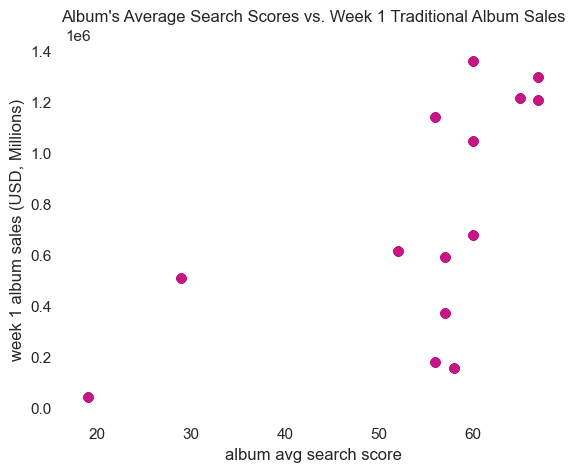

In [17]:
plt.figure(figsize = (12, 9))

alb_group_avg_wk1_sales_scat = df_alb.plot(x = 'alb_group_st_search_avg', y='wk1_sales', color = 'mediumvioletred', style='o') 

alb_group_avg_wk1_sales_scat.grid(False)
alb_group_avg_wk1_sales_scat.set_facecolor('#FFFFFF')

plt.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales")  
plt.xlabel("album avg search score")  
plt.ylabel("week 1 album sales (USD, Millions)")  
alb_group_avg_wk1_sales_scat.get_legend().remove()

plt.show()

<Figure size 1200x900 with 0 Axes>

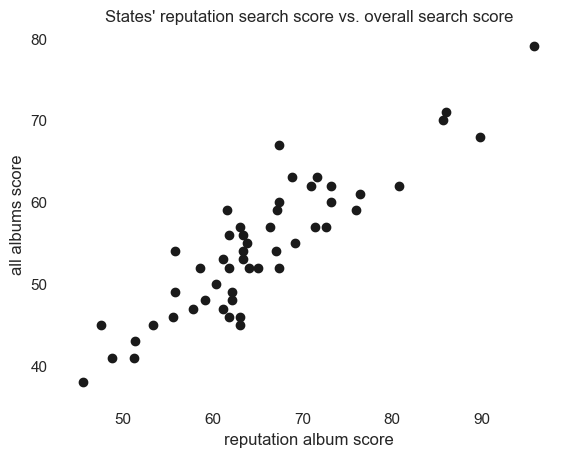

In [18]:
plt.figure(figsize = (12, 9))


rep_avg_st_avg_scat = df_state.plot(x = 'REP_avg_score', y='st_overall_search_avg',color = 'k', style='o') 

rep_avg_st_avg_scat.grid(False)
rep_avg_st_avg_scat.set_facecolor('#FFFFFF')

plt.title("States' reputation search score vs. overall search score")  
plt.xlabel("reputation album score")  
plt.ylabel("all albums score")  
rep_avg_st_avg_scat.get_legend().remove()

plt.show()


# 01. Album based dataframe

#### alb_group_st_search_avg and wk1_sales 
(corr coef 0.60, r2 score from linear regression 0.37)

# 1A. Data preprocessing

## Numerical df

In [19]:
df_alb_clust = df_alb.select_dtypes(include='number')

## Data standardization

In [20]:
# standardize the dataset in order to give all variables equal weight

scaler = StandardScaler()
df_alb_std = scaler.fit_transform(df_alb_clust)

## Dimensionality reduction

In [21]:
# Fit standardized data using PCA

pca= PCA()
pca.fit(df_alb_std)

PCA()

## Make Feature decision: PCA explained 

In [22]:
# Shows how much variance is explained by each of the components

pca.explained_variance_ratio_

array([2.85360768e-01, 2.11992796e-01, 1.19926777e-01, 7.83351681e-02,
       7.54371070e-02, 5.77690087e-02, 4.06572310e-02, 3.97191937e-02,
       2.99303186e-02, 2.55955805e-02, 1.48339033e-02, 8.89693087e-03,
       7.95442668e-03, 2.79798831e-03, 7.92802147e-04, 2.35784025e-31,
       8.50311629e-33, 3.41636706e-33, 3.18539397e-33, 2.15356083e-33,
       2.15356083e-33, 2.15356083e-33, 2.15356083e-33, 2.15356083e-33,
       2.15356083e-33, 1.91794313e-34])

In [23]:
pca.explained_variance_ratio_.shape

(26,)

Text(0, 0.5, 'Cumulative Explained Variance')

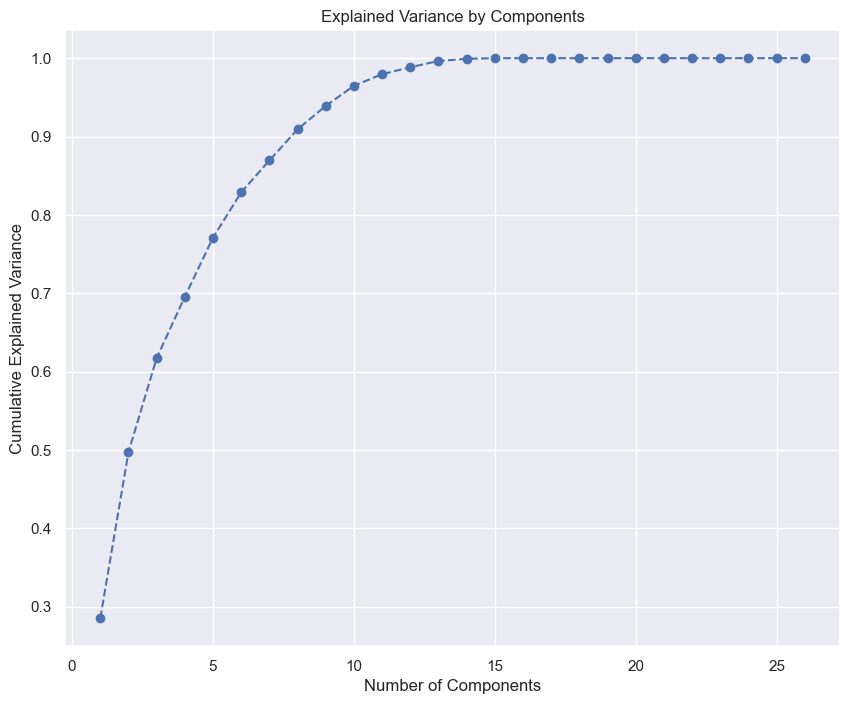

In [24]:
# Create a cumulative variance plot

plt.figure(figsize = (10,8))
plt.plot(range(1,27), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Observation: I reach over 80% of data information with 6 out of 27 components. The curve itself starts to shift between 4 and 6 components.

## Perform PCA with the chosen number of components

In [25]:
# Choosing to keep 6 components at this point based on the 80% metric

pca = PCA(n_components = 6)

In [26]:
# Fit the model on the data with the selected number of componenents

pca.fit(df_alb_std)

PCA(n_components=6)

In [27]:
# Calculate resulting components scores for elements in data set

pca.transform(df_alb_std)

array([[ 2.16925796, -1.95229326, -1.92494056, -0.86927524,  1.12082802,
         0.95282195],
       [ 2.24574557, -1.83250308, -1.74115473, -0.55137139,  0.8459946 ,
         1.00838542],
       [ 2.19463628, -1.91262593, -1.86454734, -0.76644994,  1.03215737,
         0.9701499 ],
       ...,
       [-0.08338961,  5.51461036,  0.25942348, -0.05603973, -0.95258916,
         0.31736595],
       [-0.04773301,  5.57042838,  0.34491221,  0.09130975, -1.07990379,
         0.34291374],
       [-0.03249191,  5.5942603 ,  0.3812524 ,  0.15338205, -1.13345904,
         0.3534537 ]])

In [28]:
scores_pca = pca.transform(df_alb_std)

Will incorporate new PCA scores into the K-means algorithm to perform segmentation based on principal components scores instead of original features.

# 1B. Incorporating PCA with K-means

## The elbow technique

### Decide number of clusters 

In [29]:
# Fit the k means using the transformed data from PCA
# Determine the within cluster sum of squares (WCSS) for each solution
# using algorithm with a different number of clusters
# Choosing between 1 and 10 clusters

wcss = []

for i in range (1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

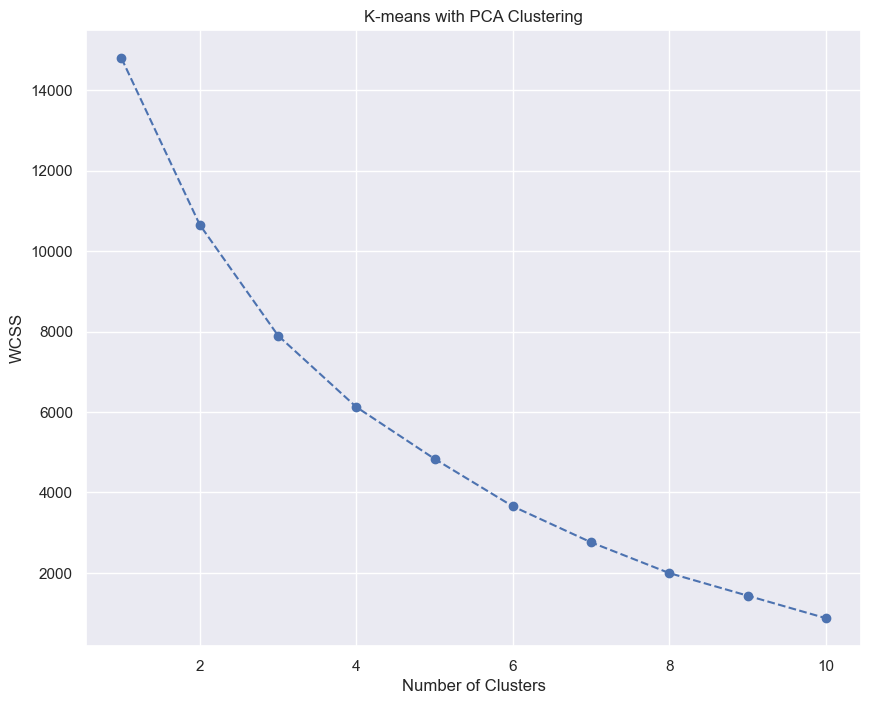

In [30]:
# Plot WCSS against the number of components on a graph

plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

### Observations: Decision to keep 4 clusters. 

##  Implement K means using pca

In [31]:
# Choice to use 4 clusters

kmeans_pca = KMeans(n_clusters = 4, init='k-means++', random_state=42)

In [32]:
# Fit  data with the k-means pca model

kmeans_pca.fit(scores_pca)

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

# 1C. Analyze results

In [33]:
# Create new df with the original features and add the PCA scores and assigned clusters
df_alb_segm_pca_kmeans = pd.concat([df_alb.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_alb_segm_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4',
                                            'Component 5', 'Component 6']

# Add the pca k-means clustering labels in the last column
df_alb_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [34]:
df_alb_segm_pca_kmeans.head()

,alb_state_key,alb_num,album_id,state,state_num,st_group_alb_search_avg,alb_group_st_search_avg,alb_r_date,record_type,tvflag,...,dur_m,color,alb_genre,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,"1989, Alabama",5,1989,Alabama,1,67.0,67.0,2014-10-27,original,False,...,230733.0,skyblue,pop,2.169258,-1.952293,-1.924941,-0.869275,1.120828,0.952822,0
1,"1989, Alaska",5,1989,Alaska,2,52.0,67.0,2014-10-27,original,False,...,230733.0,skyblue,pop,2.245746,-1.832503,-1.741155,-0.551371,0.845995,1.008385,0
2,"1989, Arizona",5,1989,Arizona,3,62.0,67.0,2014-10-27,original,False,...,230733.0,skyblue,pop,2.194636,-1.912626,-1.864547,-0.766450,1.032157,0.970150,0
3,"1989, Arkansas",5,1989,Arkansas,4,72.0,67.0,2014-10-27,original,False,...,230733.0,skyblue,pop,2.143527,-1.992749,-1.987940,-0.981528,1.218320,0.931914,0
4,"1989, California",5,1989,California,5,63.0,67.0,2014-10-27,original,False,...,230733.0,skyblue,pop,2.189391,-1.920938,-1.877877,-0.791540,1.054126,0.964966,0


In [35]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA'],
      dtype='object')

In [36]:
# Create new column named cluster and map clusters inside it, with a clear label and numbers that >0

df_alb_segm_pca_kmeans['cluster'] = df_alb_segm_pca_kmeans['Segment K-means PCA'].map({0:1,
                                                    1: 2,
                                                    2: 3,
                                                    3: 4})

In [37]:
df_alb_segm_pca_kmeans['cluster'].value_counts()

cluster
1    204
4    204
3    153
2    153
Name: count, dtype: int64

## Visualize components

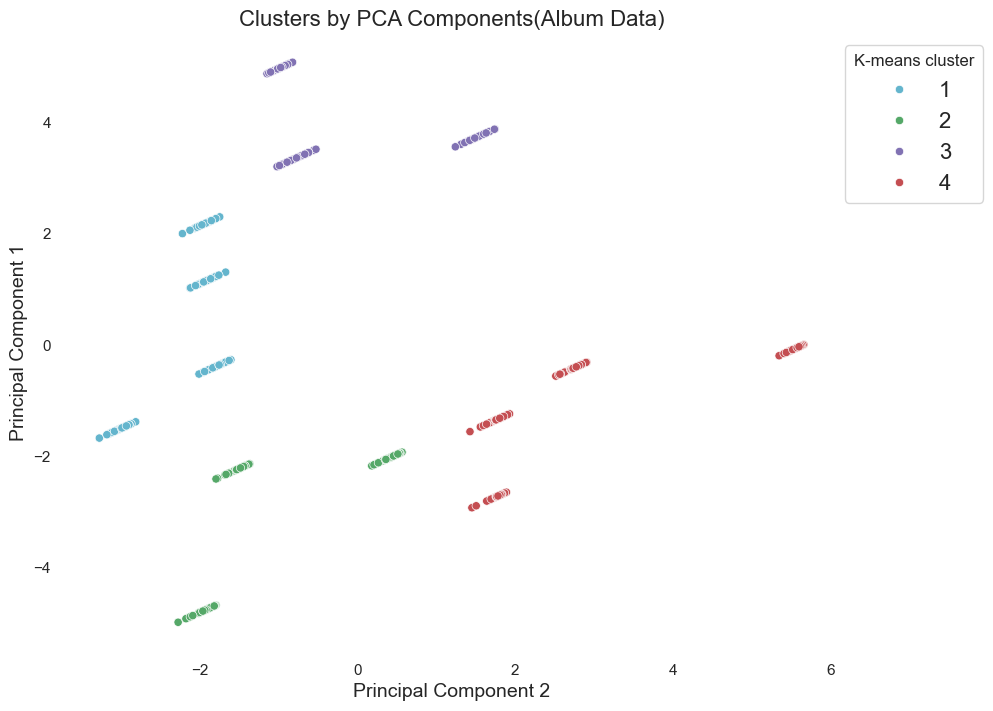

In [38]:
# Plot data by PCA components
# y-axis is first and x-axis is second

plt.figure(figsize = (10, 8))

alb_pca_comp_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='Component 2', y='Component 1', hue='cluster', hue_order=[1,2,3,4], palette=['c','g', 'm', 'r'])

alb_pca_comp_clust_scatt.grid(False)
alb_pca_comp_clust_scatt.set_facecolor('#FFFFFF')
plt.title('Clusters by PCA Components(Album Data)', fontsize=16)
plt.xlabel('Principal Component 2', fontsize=14)
plt.ylabel('Principal Component 1', fontsize=14)
legend = plt.legend(bbox_to_anchor=(1.2, 1), title='K-means cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()


In [39]:
# Export viz

alb_pca_comp_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_pca_comp_clust_scatt.png'))

## Plot the clusters for the variables

In [40]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA', 'cluster'],
      dtype='object')

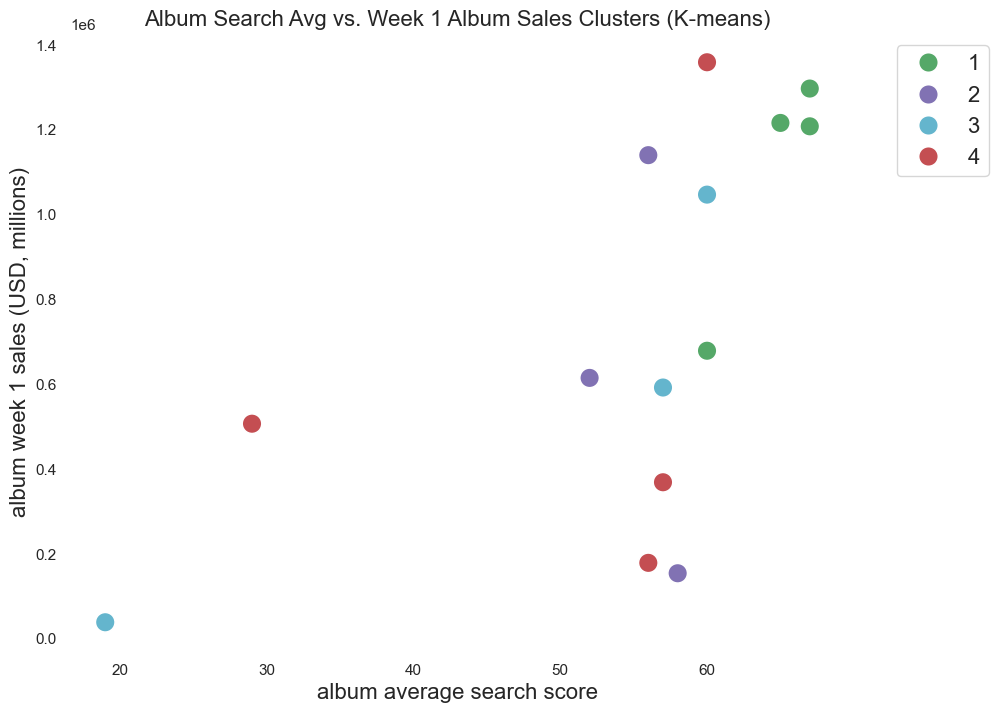

In [41]:
# Plot the clusters for the 'alb_group_st_search_avg' and 'wk1_sales'

plt.figure(figsize=(10,8))
alb_group_wk1_sales_kmeans_clust_scat = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='alb_group_st_search_avg', y='wk1_sales', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

alb_group_wk1_sales_kmeans_clust_scat.grid(False)
alb_group_wk1_sales_kmeans_clust_scat.set_facecolor('#FFFFFF')
plt.title('Album Search Avg vs. Week 1 Album Sales Clusters (K-means)', fontsize=16)
plt.xlabel('album average search score', fontsize=16) 
plt.ylabel('album week 1 sales (USD, millions)', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')
plt.show()


Observations: I am confused about why the third cluster is so spread out within this relationship. This perhaps shows that clusters themselves have two outliers- one in the blue and one in the red. Most cluster points show an album average search score above 50, however they have a broad range of week 1 album sales. 

- Blue and green clusters sales do go up as their album average search scores rise

###Question: 
- Since album average search scores are spread across week 1 sales, what variable has a stronger relationship to week 1 sales?
- Are there aspects tied to the clusters that can help answer the above question?
- What are the two major outliers? How are they similar to their other cluster members such that they are a part of those clusters even though they have very different search scores? 

In [42]:
# Export viz

alb_group_wk1_sales_kmeans_clust_scat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_group_wk1_sales_kmeans_clust_scat.png'))

In [43]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA', 'cluster'],
      dtype='object')

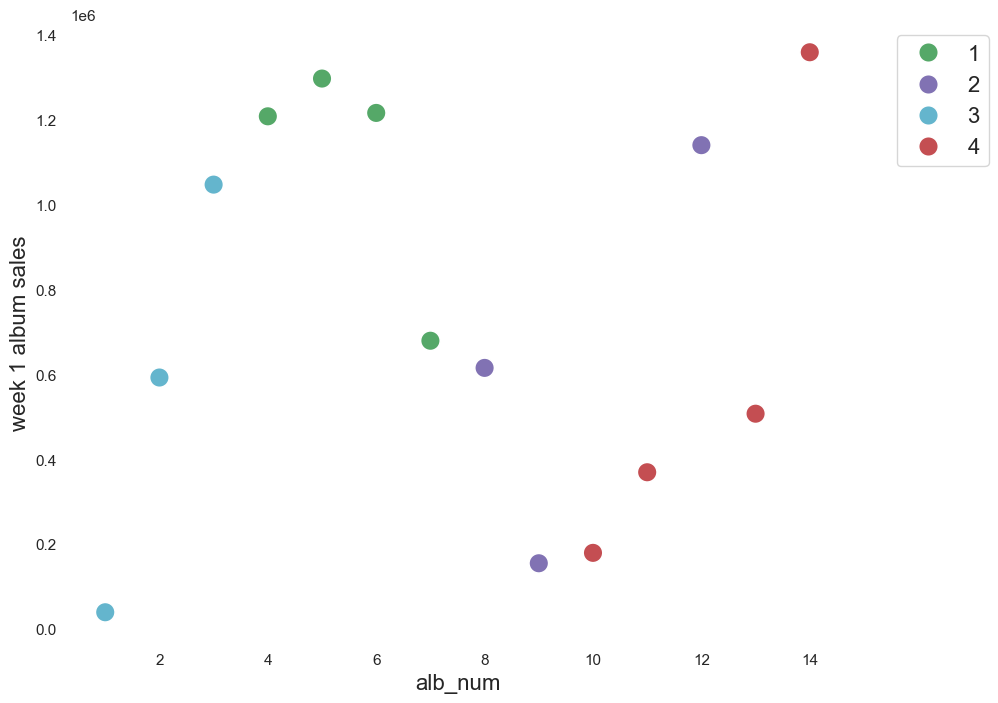

In [44]:
# Compare key variables with other variables and y variable- week 1 trad album sales
# Plot the clusters for the 'alb_num' and 'wk1_sales'

plt.figure(figsize=(10,8))
wk1s_alb_num_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='alb_num', y='wk1_sales', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

wk1s_alb_num_scatt.grid(False) 
wk1s_alb_num_scatt.set_facecolor('#FFFFFF')
plt.xlabel('alb_num', fontsize=16) 
plt.ylabel('week 1 album sales', fontsize=16) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()


Observations: 

- album_number does not seem to have a clear linear relationship with sales, but has trends
- the clusters do seem to be tied to album number
- Blue is early on (albs 1-3), 
- green is middle (4-7)
Purple and red are not in consequetive order but are still later in album number/career
- purple= 8, 9 and 12
- red = 10, 11, 13, and 14

- Week 1 sales peak for albums 4-6, 12 and 14. 3/5 peak sales are in the blue cluster. There is one green cluster observation and one red cluster observation that are also high sales 

In [45]:
album_num = pd.crosstab(df_alb_segm_pca_kmeans['alb_num'], df_alb_segm_pca_kmeans['alb_genre'], dropna=False)

In [46]:
album_num

alb_genre,alt,country,pop,rock
alb_num,,,,
1,0,51,0,0
2,0,51,0,0
3,0,0,0,51
4,0,0,0,51
5,0,0,51,0
6,0,0,51,0
7,0,0,51,0
8,51,0,0,0
9,51,0,0,0


Blue is early on (albs 1-3), Blue includes country and one rock
green is middle (4-7), green includes one rock and 3 pop
purple (8, 9 and 12) includes two alt and one pop
red (10, 11, 13, and 14)includes one country, one rock, and two pops

In generall, album state average search score is spread out in terms of clusters. The green cluster has the most high state search average values. 

While genre plays a role, there are genre mixes among the groups. 

In [47]:
# Crosstab of clusters and album number
# This will show me the album groupings for each cluster

alb_clust_crosstab = pd.crosstab(df_alb_segm_pca_kmeans['album_id'], df_alb_segm_pca_kmeans['cluster'], dropna=False)

In [48]:
alb_clust_crosstab

cluster,1,2,3,4
album_id,,,,
1989,51,0,0,0
1989TV,0,0,0,51
DEBUT,0,0,51,0
EVER,0,51,0,0
FEAR,0,0,51,0
FEARTV,0,0,0,51
FOLK,0,51,0,0
LOVE,51,0,0,0
MIDN,0,51,0,0


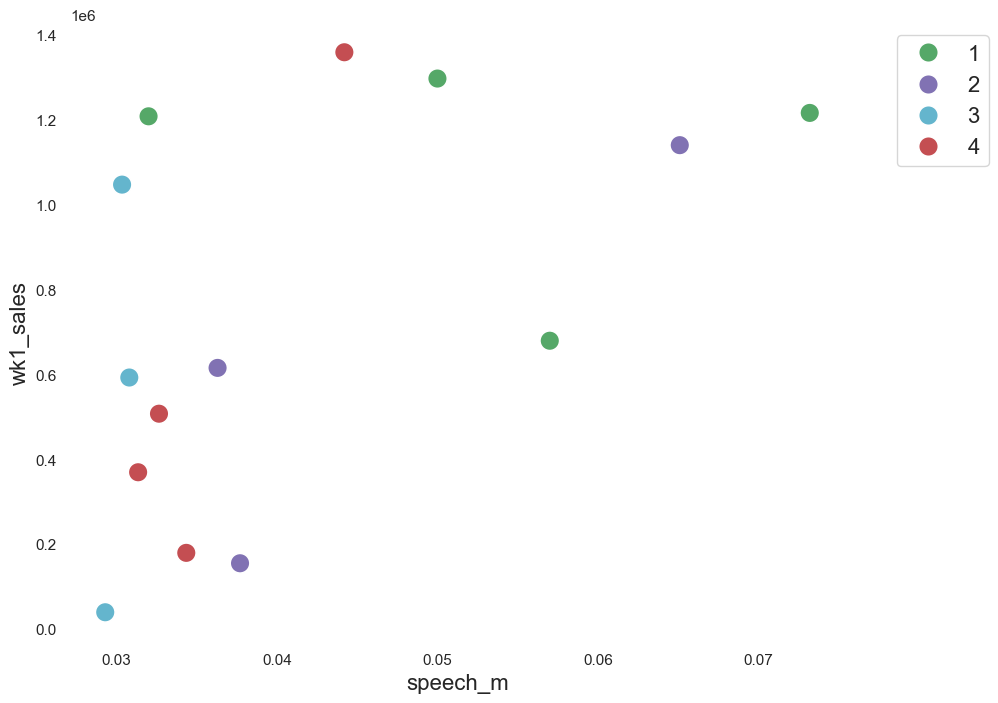

In [49]:
# Compare key variables with other variables and y variable- week 1 trad album sales
# Plot the clusters for the 'speech_m' and 'wk1_sales'
# speech_m was originally examined as a relationship with week1_sales

plt.figure(figsize=(10,8))
speech_wk1_sales_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='speech_m', y='wk1_sales', 
                                                         hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200
) 

speech_wk1_sales_scatt.grid(False) 
speech_wk1_sales_scatt.set_facecolor('#FFFFFF')
plt.xlabel('speech_m', fontsize=16)
plt.ylabel('wk1_sales', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')
plt.show()


- Speech_m scores are spread across clusters and only show a linear relationship for about half the observations
- Key point: albums with speech_m scores over 0.04 have higher sales (above 0.6 mil) vs. albums under 0.04, which have sales under 0.6 million. 
- This shows two album groupings in regards to speech_m and wk1 sales

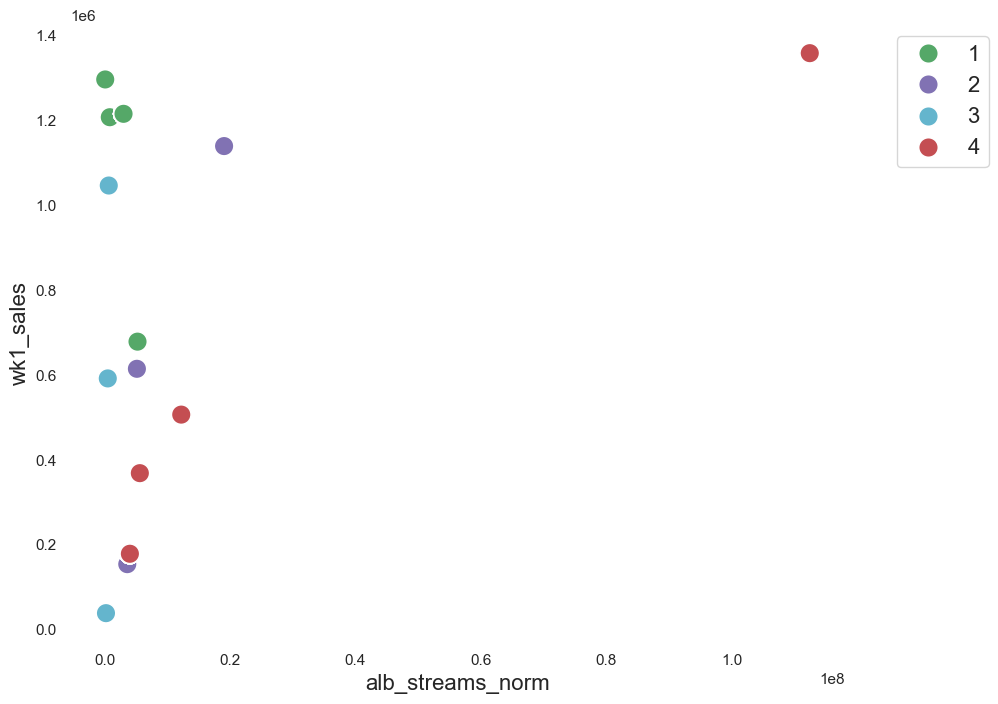

In [50]:
# Compare key variables with other variables and y variable- st_group
# Plot the clusters for the 'alb_streams_norm' and 'wk1_sales'

plt.figure(figsize=(10,8))
alb_streams_n_wk1_sales_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='alb_streams_norm', y='wk1_sales', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

alb_streams_n_wk1_sales_clust_scatt.grid(False) 
alb_streams_n_wk1_sales_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel('alb_streams_norm', fontsize=16)
plt.ylabel('wk1_sales', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')
plt.show()


An increase in album streams(normalized) does not show an increase in week 1 sales for all albums except fo 1989TV.

- The red group has clearly the highest outlier in streams  and sales. 
- The green group has the highest week one sales as a cluster. 
- The blue group is spread throughout, and includes the lowest sale. 
- Purple is middle sales.

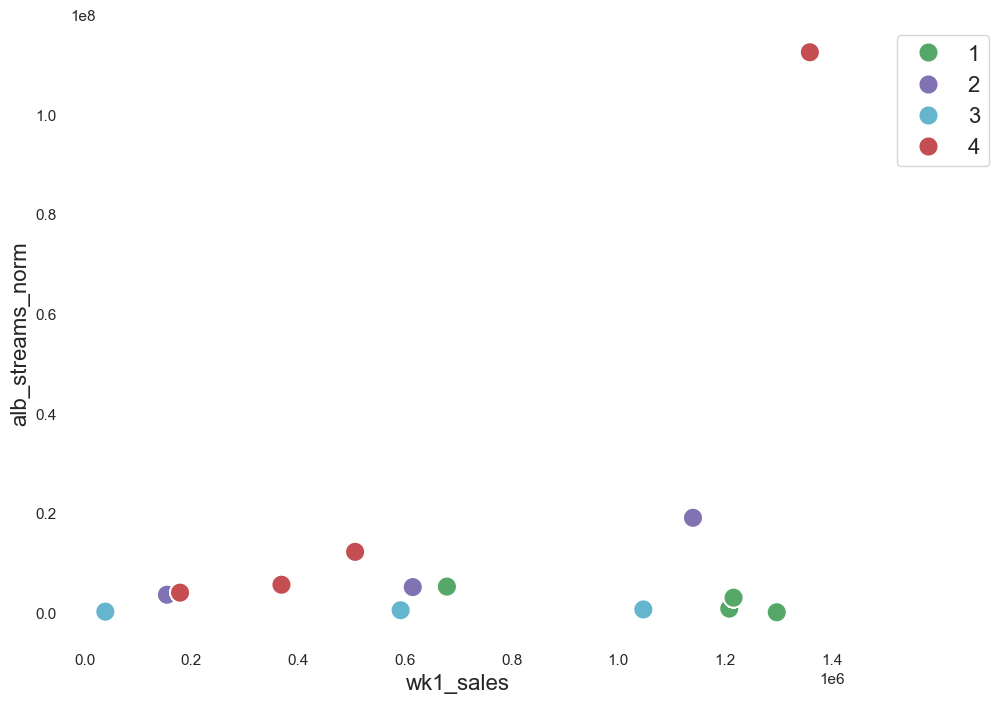

In [51]:
# Plot the above chart in reverse, since week 1 sales figures come out early in an album,
# and one might want to predict album streams

plt.figure(figsize=(10,8))
wk1_sales_alb_streams_n_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='wk1_sales', y='alb_streams_norm', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

wk1_sales_alb_streams_n_clust_scatt.grid(False) 
wk1_sales_alb_streams_n_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel('wk1_sales', fontsize=16)
plt.ylabel('alb_streams_norm', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')
plt.show()


Week 1 sales figures do not correlate with an album's noramlized stream count, outside of the consistent outlier- 1989TV

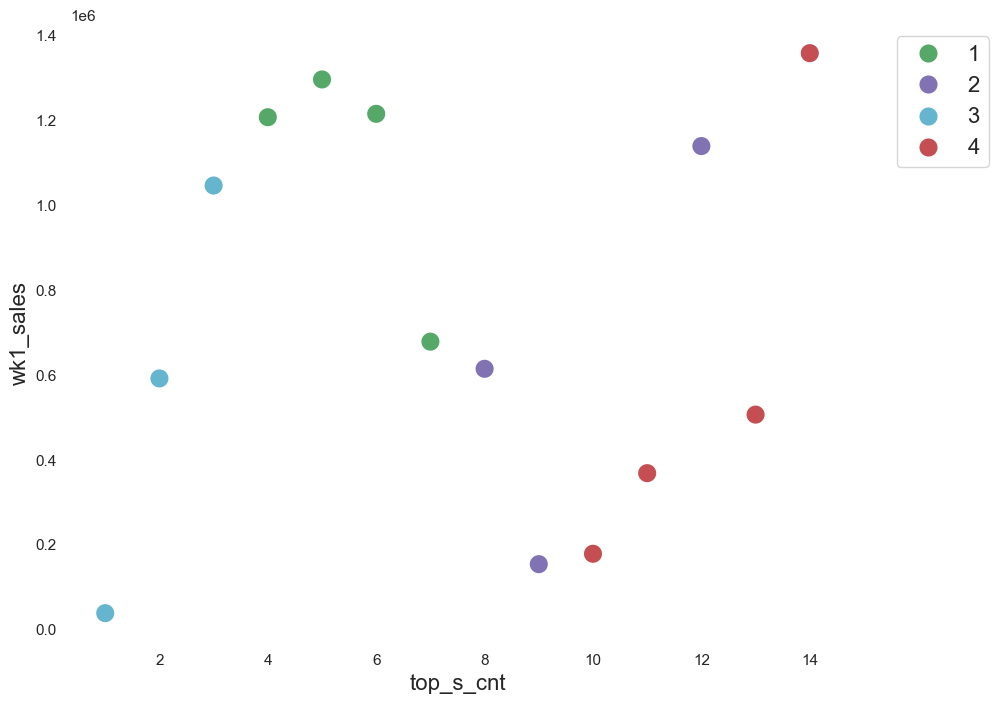

In [52]:
# Compare key variables with other variables and y variable- week 1 trad album sales
# Plot the clusters for the 'top_s_cnt' and 'wk1_sales'

plt.figure(figsize=(10,8))
top_s_cnt_wk1_sales_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='top_s_cnt', y='wk1_sales', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 
top_s_cnt_wk1_sales_clust_scatt.grid(False)
top_s_cnt_wk1_sales_clust_scatt.set_facecolor('#FFFFFF')

plt.xlabel('top_s_cnt', fontsize=16)
plt.ylabel('wk1_sales', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

There is not a linear relationship across clusters for top song count.

However, there is a clear pattern in clusters and top song count.

- Blue and red: as top song count goes up, so does week 1 sales

- There are two peaks for week 1 sales between 3 and 5 top songs and again with 14 top songs

- The blue (early on albums) top song count increasing along with sales could be a product of Taylor launching her career and gaining fame (vs. specific album preference)


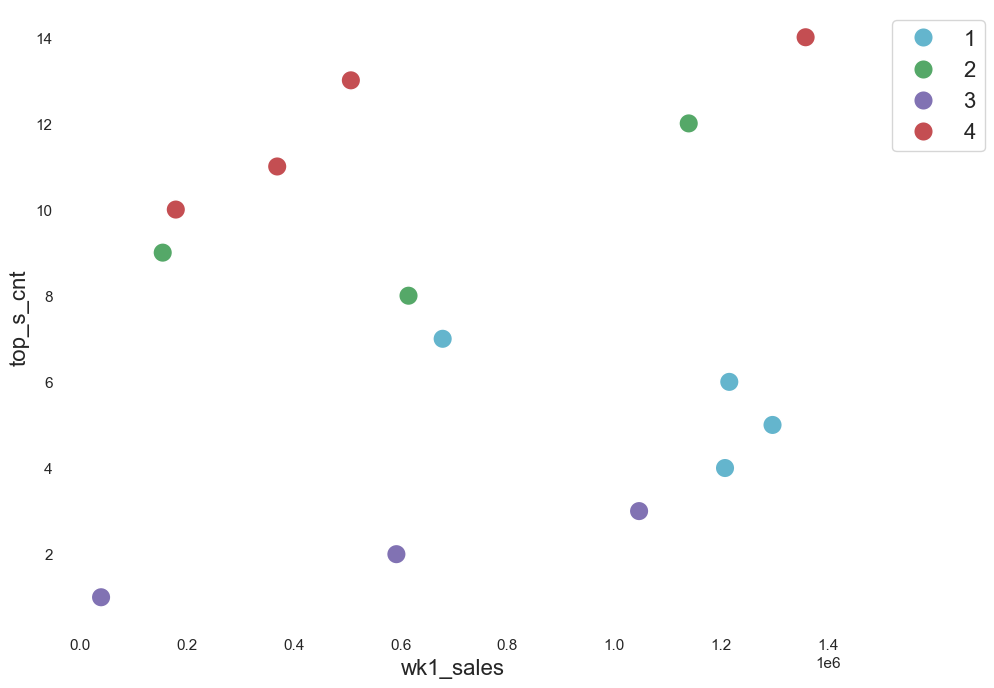

In [53]:
# Similar to last relationship, switch plot axes since wk1_sales figures come out prior to Billboard Top Song counts over time

# Plot the clusters for the 'top_s_cnt' and 'wk1_sales', switch x and y

plt.figure(figsize=(10,8))
top_s_cnt_wk1_sales_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='wk1_sales', y='top_s_cnt', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['c','g', 'm', 'r'], s=200) 
top_s_cnt_wk1_sales_clust_scatt.grid(False)
top_s_cnt_wk1_sales_clust_scatt.set_facecolor('#FFFFFF')

plt.xlabel('wk1_sales', fontsize=16)
plt.ylabel('top_s_cnt', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

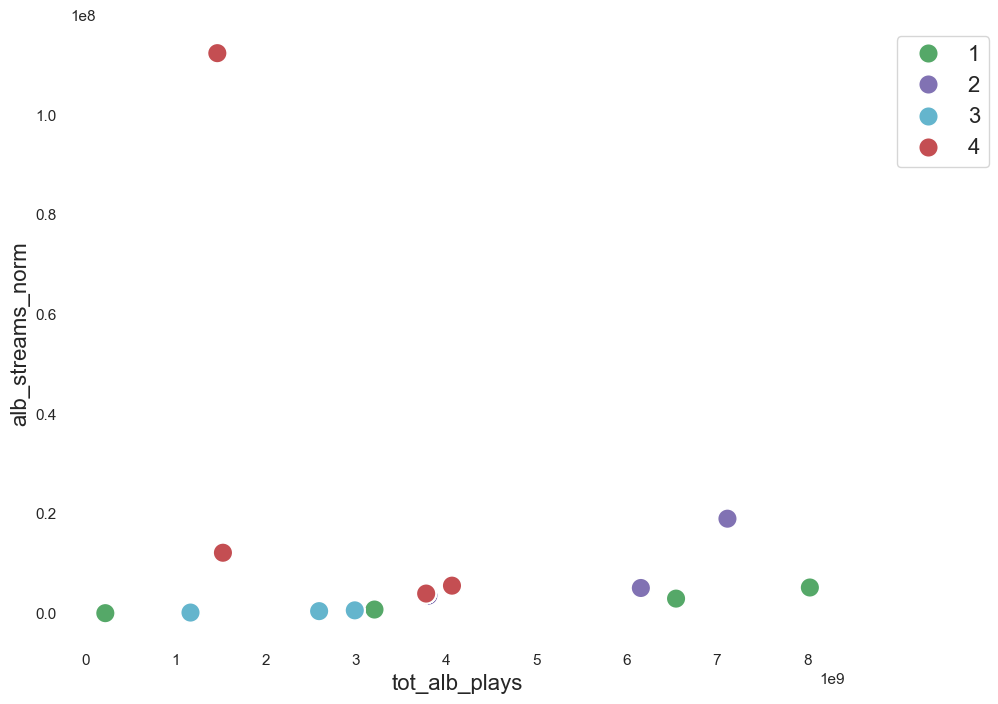

In [54]:
# Compare album streams
# Want to see how each cluster differs between total streams vs. streams normalized
# This will help show which clusters are the most time based

# Plot the clusters for the 'tot_alb_plays' and 'alb_streams_norm'

plt.figure(figsize=(10,8))
alb_streams_tot_vs_norm_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='tot_alb_plays', y='alb_streams_norm', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

alb_streams_tot_vs_norm_clust_scatt.grid(False) 
alb_streams_tot_vs_norm_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel('tot_alb_plays', fontsize=16)
plt.ylabel('alb_streams_norm', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

This is such a clear outlier issue. 
- The top red dot is 1989TV. The blue dots are the earliest (and least successful) records, so it is interesting that they have the least total plays compared to the other groups. 
- Taylor's versions (red dots) have impressive total album plays and streams considering they are years away from purple and green dots, and in some cases over a decade since blue. 
- The purple group shows impressive total plays because that group is newer than both the blue group and green group, yet has more total plays. 

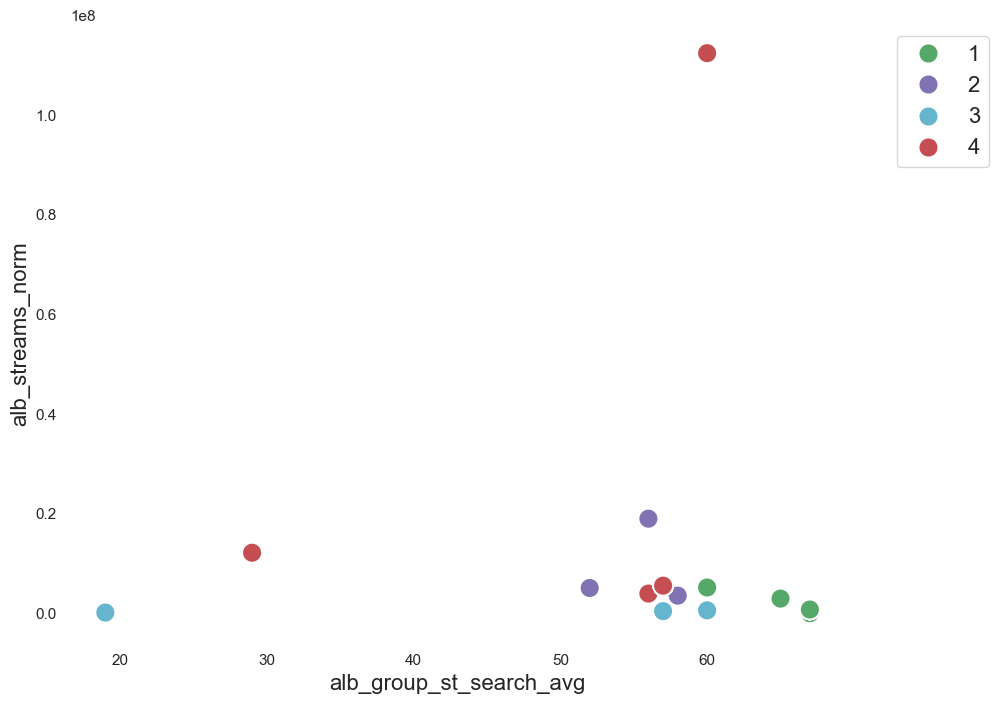

In [55]:
# Plot the above chart in reverse, since week 1 sales figures come out early in an album,
# and one might want to predict album streams

plt.figure(figsize=(10,8))
alb_group_st_search_avg_streams_norm_clust_scatt = sns.scatterplot(data = df_alb_segm_pca_kmeans, x='alb_group_st_search_avg', y='alb_streams_norm', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['g', 'm', 'c', 'r'], s=200) 

alb_group_st_search_avg_streams_norm_clust_scatt.grid(False) 
alb_group_st_search_avg_streams_norm_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel('alb_group_st_search_avg', fontsize=16)
plt.ylabel('alb_streams_norm', fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')
plt.show()


No clear insights between these variables or clusters, other than the 1989TV outlier and idea that alb_group_st_search average does not have a relationship with album streams normalized.

## Compare cluster statistics across variables

In [56]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA', 'cluster'],
      dtype='object')

In [57]:
df_alb_segm_pca_kmeans.loc[df_alb_segm_pca_kmeans['cluster'] == 1, 'cluster_color'] = 'green'
df_alb_segm_pca_kmeans.loc[df_alb_segm_pca_kmeans['cluster'] == 2, 'cluster_color'] = 'purple'
df_alb_segm_pca_kmeans.loc[df_alb_segm_pca_kmeans['cluster'] == 3, 'cluster_color'] = 'blue'
df_alb_segm_pca_kmeans.loc[df_alb_segm_pca_kmeans['cluster'] == 4, 'cluster_color'] = "red"

C:\Users\leobs\AppData\Local\Temp\ipykernel_6600\512118977.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'green' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_alb_segm_pca_kmeans.loc[df_alb_segm_pca_kmeans['cluster'] == 1, 'cluster_color'] = 'green'


In [58]:
# Check for cluster, cluster numbers, and cluster color allignment
df_alb_segm_pca_kmeans.groupby(['Segment K-means PCA', 'cluster', 'cluster_color']).size()

Segment K-means PCA  cluster  cluster_color
0                    1        green            204
1                    2        purple           153
2                    3        blue             153
3                    4        red              204
dtype: int64

In [59]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA', 'cluster', 'cluster_color'],
      dtype='object')

In [60]:
# Display full numbers to help compare clusters

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [61]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

In [62]:
# Focus on stats for key variables

alb_kmeans_stats = df_alb_segm_pca_kmeans.groupby('cluster_color').agg({'cluster': ['median'],
                                                'alb_num': ['median'],
                                                'wk1_sales': ['mean', 'median'],
                                               'st_group_alb_search_avg': ['mean', 'median'],
                                               'alb_group_st_search_avg': ['mean', 'median'],
                                               'tot_alb_plays': ['mean', 'median'],
                                               'alb_streams_norm': ['mean', 'median'],
                                               'tvflag': ['mean', 'median'],
                                               'alb_track_cnt': ['mean', 'median'],
                                               'top_s_cnt': ['mean', 'median'],
                                              'speech_m': ['mean','median'],
                                               'alb_r_day': ['mean','median']
                                             })

In [63]:
alb_kmeans_stats = alb_kmeans_stats.sort_values(by=('cluster', 'median'), ascending=True)

In [64]:
alb_kmeans_stats

cluster alb_num   wk1_sales             st_group_alb_search_avg  \
               median  median        mean      median                    mean   
cluster_color                                                                   
green           1.000   5.500 1100000.000 1212000.000                  64.902   
purple          2.000   9.000  636500.000  615000.000                  55.458   
blue            3.000   2.000  559433.333  592300.000                  45.353   
red             4.000  12.000  603500.000  438000.000                  50.578   

                     alb_group_st_search_avg         tot_alb_plays  \
              median                    mean median           mean   
cluster_color                                                        
green         63.000                  64.750 66.000 4500229262.125   
purple        54.000                  55.333 56.000 5691274014.333   
blue          48.000                  45.333 57.000 2247092281.333   
red           52.000                  50.500 56.500 2706633212.500   

                             alb_streams_norm             tvflag         \
                      median             mean      median   mean median   
cluster_color                                                             
green         4875253029.000      2266894.000 1891651.500  0.000  0.000   
purple        6156253069.000      9245369.000 5119556.000  0.000  0.000   
blue          2590571504.000       430211.667  473068.000  0.000  0.000   
red           2650651470.000     33567290.750 8892062.500  1.000  1.000   

              alb_track_cnt        top_s_cnt        speech_m        alb_r_day  \
                       mean median      mean median     mean median      mean   
cluster_color                                                                   
green                17.750 17.000     5.500  5.500    0.053  0.053    17.500   
purple               19.000 17.000     9.667  9.000    0.046  0.038    18.667   
blue                 18.000 19.000     2.000  2.000    0.030  0.030    20.000   
red                  25.000 24.000    12.000 12.000    0.036  0.034    13.750   

                      
              median  
cluster_color         
green         18.500  
purple        21.000  
blue          24.000  
red           10.500

# 1D. Key Observations: 
## These clusters provide valuable insights because they created groupings that help cluster albums. Each cluster has trends within variables that are insightful.

## Blue = DEBUT, FEAR, SPEAK
- Lowest album numbers
- Earliest albums in career
- 2 country, 1 rock genres'''
- all originals to re-record
- lowest top song count
- lowest week 1 sales, search average, total plays, and top song count
- lowest album streams normalized (for time)
- lowest album song speechiness
- latest album release day


## Green = RED, 1989, REP, LOVE
- early to mid career
- 1 rock and 3 pop
- 3 originals to re-record, one always Taylor owned
- highest week 1 sales
- highest state search average and album group search average
- 2nd total spotify plays
- 2nd album streams normalized (for time)- least impacted by time with stream rankings
- 3rd top song count
- 1st album song speechiness
- middle release day

## Purple = EVER, FOLK, MIDN
- mid to late career
- all always Taylor owned (made post-album release process and without original pairs)
- only group with alt genre
- 2 alt and 1 pop genre (but pop-MIDN-has dif feel vs. other pop albums)
- 2nd highest total track count
- 2nd latest release day
- 2nd highest top song count
- 2nd week 1 sales
- 2nd state group and album group search average
- highest total plays (very interesting!) since 2nd in other success measures
- 3rd most album streams normalized (time was big factor in total plays)
- 2nd album song speechiness

## Red = REDTV, SPEAKTV, FEARTV, 1989TV
- late in career
- 1 country, 1 rock, 2 pop
- ALL Taylor's versions (neat that they allign so well!)
- lowest week 1 sales median, 2nd lowest week1 sales mean
- 3rd album group search avg and state search avg (interesting given all the hype around TV versions)
*google scores can also mean bad googling- not just popularity*
- highest album track count
- 3rd for total Spotify plays (time could be a big factor just for TV versions?)
- highest (BY FAR) album streams normalized (for time)
- earliest release day
- highest top song count (by far)


## Overall Album Cluster Trends
### album group average search scores vs. week 1 sales
- 12/14 albums have scores above 50, but they are spread out across sales (0.2-1.4 mil)
- Blue and green clusters show a linear relationship (increase average scores and increase wk1 sales)
- Sales peaked for album number 4-6, 12, and 14 (this can be tied to years/eras, too)
- NOT a key variable relationship compared to all variables, yet the strongest relationship in week 1 sales
#### Question: what do clusters show about week 1 sales?
- Green group has the highest week 1 sales. What does this group have in common? (see above)

### Album streams (normalized)
- This measure has the biggest difference between clusters
- The Taylor's Version cluster (4, red) has the highest album streams normalized BY FAR
- 1989TV is a major outlier
- An increase in streams does not equal higher sales
#### Question: could we compare 1989TV success with potential for REPTV success? How similar are the OG REP and TV albums?
- Next step would be to compare stats on REP vs. 1989 originals

### Week 1 sales and top song count
- For two groups (blue and red), as their top song increases, so do sales
- Purple and red have the highest top song counts- which is interesting because purple includes EVER, FOLK, and MIDN (different albums than the rest and only 2 alternative)
#### Question: does the relationship between these variables early on have to do with Taylor growing in fame (vs. album preference)?
#### Next step could be to highlight a top album for each success measure (ie which is most streamed vs. top songs etc.

### Speech_m and week 1 sales
- This was one of the prior key relationships
- It is spread throughout clusters, but there is one handy pattern:
  - Albums with a speech score >0.05 have sales above 0.6
  - Albums with a speech score <0.5 have sales <0.6
- While this isn't linear, it does show a threshold for ideal speech scores for sale success

### Other trends
- REP avg and MIDN averages have the biggest ties to overall state search score. This alludes to the idea that her fanbase has changed in musical preference
- Related to this, the weakest relationship across genres is between country and alternative. This is interesting since alternative albums are in the cluster with the highest top song counts


# State based dataframe
## Variables of focus
### alb_group_st_search_avg and wk1_sales 
(corr coef 0.60, r2 score from linear regression 0.37)

## 2A. Data preprocessing

In [65]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   st_overall_search_avg  51 non-null     float64
 2   top_alb_num            51 non-null     int64  
 3   st_top_album           51 non-null     object 
 4   top_alb_num.1          51 non-null     int64  
 5   max_gsearch_score      51 non-null     int64  
 6   st_lowest_album        51 non-null     object 
 7   REP_avg_score          51 non-null     float64
 8   country_norm           51 non-null     float64
 9   pop_norm               51 non-null     float64
 10  rock_norm              51 non-null     float64
 11  alt_norm               51 non-null     float64
 12  always_ts_sum          51 non-null     int64  
 13  originals_sum          51 non-null     int64  
 14  taylorsversions_sum    51 non-null     int64  
 15  upcoming_sum 

### Numerical df

In [66]:
df_state_clust = df_state.select_dtypes(include='number')

### Standardiziation

In [67]:
# standardize the dataset in order to give all variables equal weight

scaler = StandardScaler()
df_state_std = scaler.fit_transform(df_state_clust)


In [68]:
df_state_std

array([[-0.29466057, -0.88052056, -0.88052056, ..., -0.27400138,
        -0.59213231, -1.69841555],
       [-1.01598964,  1.17235023,  1.17235023, ..., -1.30803587,
        -0.94605845, -1.63047893],
       [-0.6553251 , -0.11069401, -0.11069401, ..., -0.75888761,
        -0.26475063, -1.56254231],
       ...,
       [ 0.18622548, -1.13712941, -1.13712941, ...,  0.73666509,
        -0.60098047,  1.56254231],
       [ 0.18622548, -0.11069401, -0.11069401, ..., -0.02279527,
         0.4519498 ,  1.63047893],
       [-1.13621115, -0.88052056, -0.88052056, ..., -1.17951181,
        -0.65406939,  1.69841555]])

### Reduce dimensionality

In [69]:
# Fit standardized data using PCA

pca_st= PCA()
pca_st.fit(df_state_std)

PCA()

### PCA explained features

In [70]:
# Shows how much variance is explained by each of the components

pca_st.explained_variance_ratio_

array([5.94464077e-01, 1.70516758e-01, 7.97598419e-02, 3.63330016e-02,
       2.64841275e-02, 1.87028311e-02, 1.46286162e-02, 1.30699997e-02,
       1.15222645e-02, 8.51561571e-03, 6.85730678e-03, 5.45378447e-03,
       4.90370634e-03, 4.00139307e-03, 2.23157559e-03, 1.51714528e-03,
       1.02364458e-03, 1.39314171e-05, 2.56076964e-07, 1.13018388e-07,
       1.02710410e-08, 7.14541129e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33, 5.68453264e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33, 5.68453264e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33, 5.68453264e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33, 5.68453264e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33, 5.68453264e-33, 5.68453264e-33, 5.68453264e-33,
       5.68453264e-33])

In [71]:
pca_st.explained_variance_ratio_.shape

(45,)

Text(0, 0.5, 'Cumulative Explained Variance')

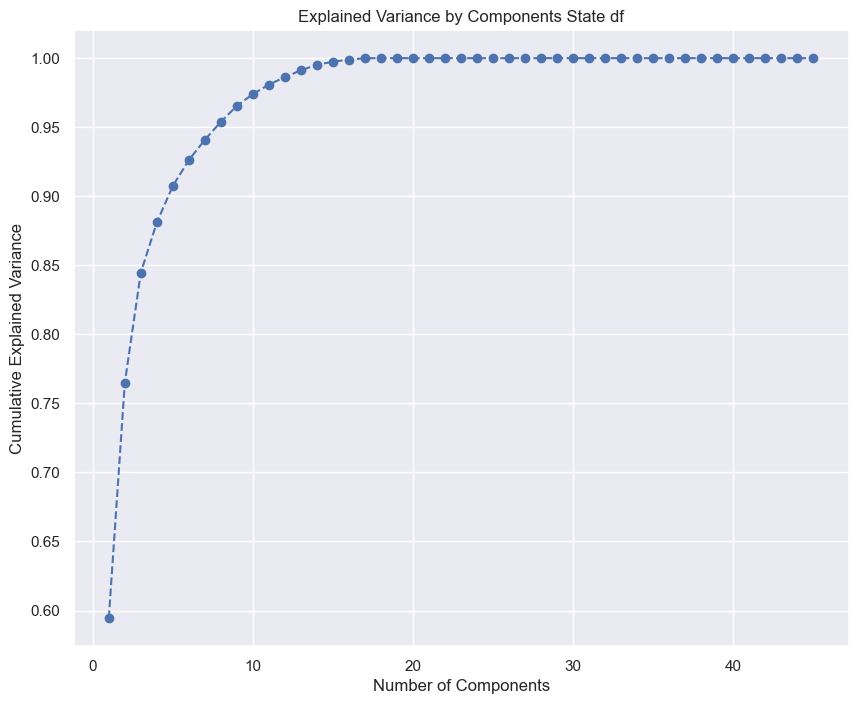

In [72]:
plt.figure(figsize = (10,8))
plt.plot(range(1,46), pca_st.explained_variance_ratio_.cumsum(), marker= 'o', linestyle = '--')
plt.title('Explained Variance by Components State df')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

####  Observations: Pass the 80% threshold after 3. Decision to keep 3 components of the 46.

### Perform Principal Components Analysis (PCA)

In [73]:
# Choosing to keep 3 components at this point based on the 80% metric

pca_st = PCA(n_components = 3)

In [74]:
# Fit the model on the data with the selected number of componenents

pca_st.fit(df_state_std)

PCA(n_components=3)

In [75]:
# Calculate resulting components scores for elements in data set

pca_st.transform(df_state_std)

array([[-1.9218515 , -2.49907221, -1.2526648 ],
       [-5.06840685,  1.17976925,  0.38844244],
       [-3.56459774,  1.12542654, -1.67489503],
       [-0.97446201, -2.47676202,  0.03799145],
       [-4.51193454,  4.67566202,  2.46579075],
       [ 0.18027121,  3.87233998,  3.04372752],
       [ 5.45006999,  1.41392887, -1.58196795],
       [-0.60194749, -2.19486539, -0.25460699],
       [ 9.32159049,  8.30302308, -2.34446867],
       [-8.4882135 ,  1.02966005, -0.3869642 ],
       [-5.40761957, -0.3729183 , -0.9204524 ],
       [-9.68161419,  3.32052853, -0.6036723 ],
       [ 1.19167732, -1.21687477, -0.70966685],
       [-1.20828314,  2.18066085, -0.23948551],
       [ 2.38547452, -1.12607697,  1.08579957],
       [ 1.40435338, -2.26865932,  0.67005959],
       [ 2.20012708, -1.20416747,  6.33036923],
       [ 3.3020464 , -3.27900488,  0.75033703],
       [-4.76075232, -3.29242561, -0.3672577 ],
       [ 4.73142843, -1.11634104, -1.29721549],
       [-3.80496735,  1.62445552, -1.611

In [76]:
scores_pca_st = pca_st.transform(df_state_std)

## 2B. Incorporate PCA with K-means

### Elbow technique

In [77]:
## decide number clusters

# Fit the k means using the transformed data from PCA
# Determine the within cluster sum of squares (WCSS) for each solution
# using algorithm with a different number of clusters
# Choosing between 1 and 10 clusters

wcss_st = []

for i in range (1, 11):
    kmeans_pca_st = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca_st.fit(scores_pca_st)
    wcss_st.append(kmeans_pca_st.inertia_)

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

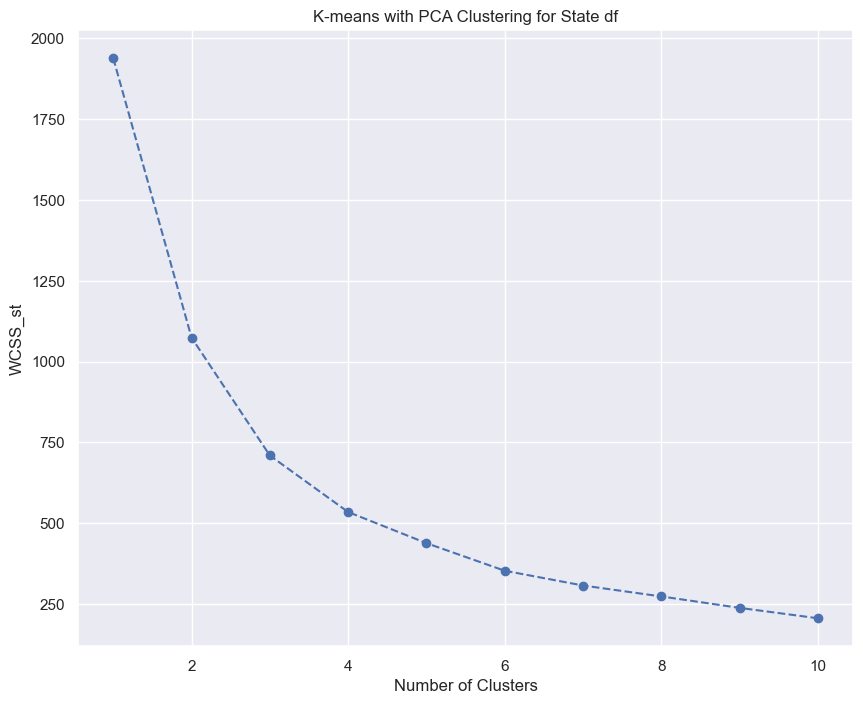

In [78]:
# Plot WCSS against the number of clusters on a graph

plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss_st, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS_st')
plt.title('K-means with PCA Clustering for State df')
plt.show()

Observations: There is a steep drop until 3 clusters. 4 starts to level out. 
#### Decision to keep 3 clusters
### Update: after running visuals, decision to keep 4 clusters

### Implement K-means

In [79]:
# Choice to use 4 clusters

kmeans_pca_st = KMeans(n_clusters = 4, init='k-means++', random_state=42)

In [80]:
# Fit data with the k-means pca model

kmeans_pca_st.fit(scores_pca_st)

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

## 2C. Analyze results

In [81]:
# Create new df with the original features and add the PCA scores and assigned clusters

df_state_segm_pca_kmeans = pd.concat([df_state.reset_index(drop=True), pd.DataFrame(scores_pca_st)], axis=1)
df_state_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# Add the pca k-means clustering labels in the last column

df_state_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca_st.labels_

In [82]:
df_state_segm_pca_kmeans.head()

,state,st_overall_search_avg,top_alb_num,st_top_album,top_alb_num.1,max_gsearch_score,st_lowest_album,REP_avg_score,country_norm,pop_norm,rock_norm,alt_norm,always_ts_sum,originals_sum,taylorsversions_sum,upcoming_sum,MIDN_avg_score,MIDN_sum_n,DEBUT_avg_score,DEBUT_sum,FEAR_avg_score,FEAR_sum,SPEAK_avg_score,SPEAK_sum,RED_avg_score,RED_sum,1989_avg_score,1989_sum,REP_sum,LOVE_avg_score,LOVE_sum,FOLK_avg_score,FOLK_sum,EVER_avg_score,EVER_sum,FEARTV_avg_score,FEARTV_sum,REDTV_avg_score,REDTV_sum,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum,state_num,st_alb_pop_group,Component 1,Component 2,Component 3,Segment K-means PCA
0,Alabama,52.000,2,FEAR,2,93,DEBUT,65.000,235.000,287.810,256.250,243.500,1030,1346,846,433,54.250,271,21.600,108,70.800,354,65.600,328,65.200,326,67.600,338,325,54.400,272,46.000,230,51.400,257,48.600,243,53.800,269,20.400,102,48.500,232,705,1439,1025,487,1,Medium search popularity,-1.922,-2.499,-1.253,2
1,Alaska,46.000,10,FEARTV,10,100,DEBUT,55.600,208.333,263.560,212.000,223.500,988,1022,866,361,48.000,240,16.600,83,46.400,232,52.000,260,54.000,270,52.000,260,278,60.200,301,43.600,218,45.800,229,62.000,310,42.200,211,21.400,107,49.750,238,625,1317,848,447,2,Low search popularity,-5.068,1.180,0.388,1
2,Arizona,49.000,5,1989,5,72,DEBUT,62.200,183.000,282.795,235.500,262.000,1065,1111,864,388,52.875,264,15.400,77,42.800,214,52.000,260,65.000,325,62.400,312,311,55.400,277,47.600,238,57.200,286,51.600,258,52.000,260,19.400,97,52.000,249,549,1413,942,524,3,Low search popularity,-3.565,1.125,-1.675,1
3,Arkansas,54.000,5,1989,5,85,DEBUT,63.400,243.333,299.285,265.250,246.000,1042,1348,917,471,58.125,290,30.800,154,67.800,339,61.600,308,68.200,341,72.000,360,317,52.000,260,44.000,220,54.400,272,47.400,237,57.400,287,25.000,125,56.000,268,730,1496,1061,492,4,Medium search popularity,-0.974,-2.477,0.038,2
4,California,46.000,13,SPEAKTV,13,100,DEBUT,61.800,142.667,279.550,231.250,247.000,1009,911,985,339,49.750,248,6.000,30,28.000,140,32.000,160,59.200,296,63.000,315,309,53.400,267,45.600,228,53.200,266,51.600,258,52.800,264,41.000,205,53.750,258,428,1397,925,494,5,Low search popularity,-4.512,4.676,2.466,1


In [83]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA'],
      dtype='object')

In [84]:
# Create new column named segment and map clusters inside it 

df_state_segm_pca_kmeans['cluster'] = df_state_segm_pca_kmeans['Segment K-means PCA'].map({0:1,
                                                    1: 2,
                                                    2: 3,
                                                    3: 4})

In [85]:
df_state_segm_pca_kmeans['cluster'].value_counts(dropna=False)

cluster
3    20
2    18
4     7
1     6
Name: count, dtype: int64

### Visualize K-means component results

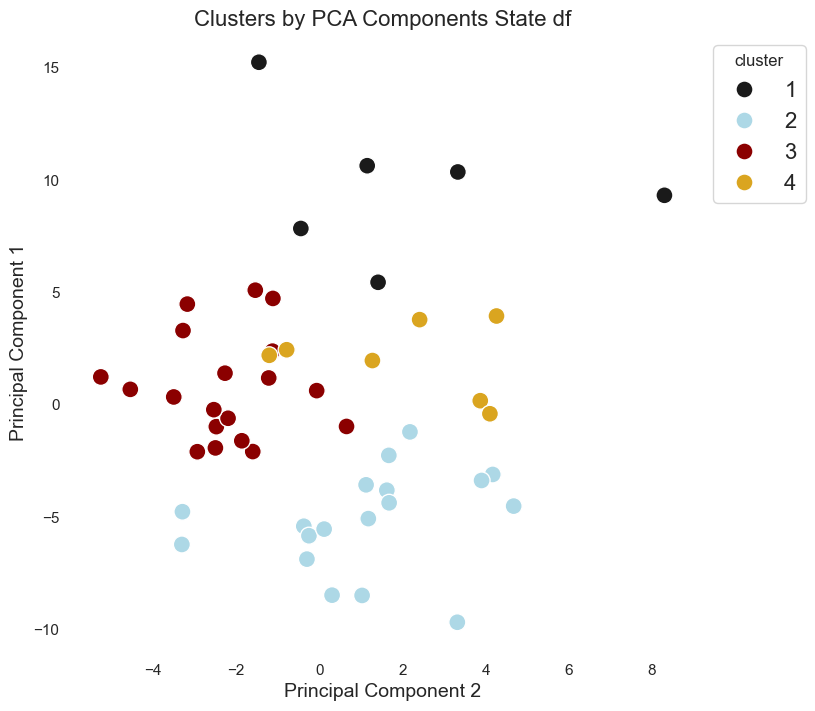

In [86]:
# Plot data by PCA components
# y-axis is first and x-axis is second
plt.figure(figsize = (8, 8))

state_pca_comp_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='Component 2', y='Component 1', hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)

state_pca_comp_clust_scatt.grid(False)
state_pca_comp_clust_scatt.set_facecolor('#FFFFFF')
plt.title('Clusters by PCA Components State df', fontsize=16)
plt.xlabel('Principal Component 2', fontsize=14)
plt.ylabel('Principal Component 1', fontsize=14)
legend = plt.legend(title='cluster', bbox_to_anchor=(1.2, 1), fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

Original Observations: There are three clusters, with the red cluster being furthest removed and having the most variance. There is still too much overlap.

-----## Edits:
Observations with 4 clusters: 
- This helps delineate the groups, especially around the middle section.
- There is still some overlap between the third and fourth clusters. The first cluster (black) has the biggest spread. 

In [87]:
# Export viz

state_pca_comp_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'state_pca_comp_clust_scatt.png'))

In [88]:
# Trace clusters to states
# This will show me the state groupings for each cluster

state_clust_crosstab = pd.crosstab(df_state_segm_pca_kmeans['state'], df_state_segm_pca_kmeans['cluster'], dropna=False)

In [89]:
state_clust_crosstab

cluster,1,2,3,4
state,,,,
Alabama,0,0,1,0
Alaska,0,1,0,0
Arizona,0,1,0,0
Arkansas,0,0,1,0
California,0,1,0,0
Colorado,0,0,0,1
Connecticut,1,0,0,0
Delaware,0,0,1,0
District of Columbia,1,0,0,0


### Plot clusters with variables

In [90]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

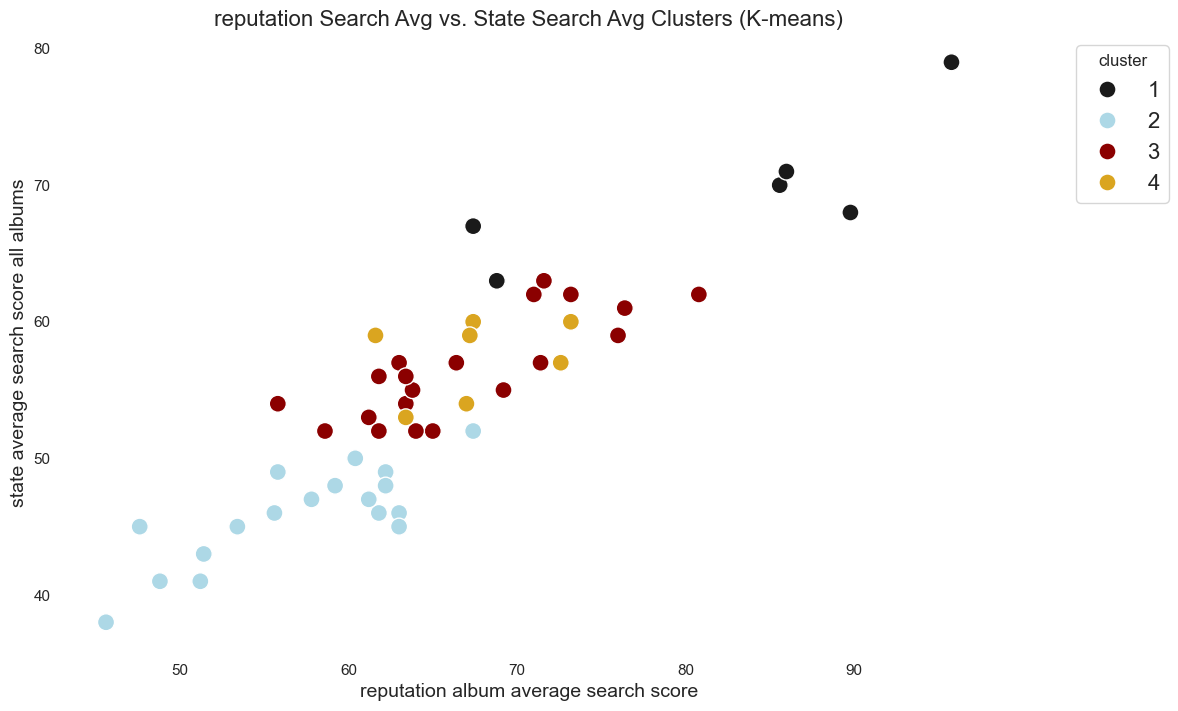

In [91]:
# Plot the clusters for the 'REP_search_avg' and 'st_overall_search_avg'

plt.figure(figsize=(12,8))
state_REP_avg_vs_wk1_sales_kmeans_clust_scat = sns.scatterplot(data = df_state_segm_pca_kmeans, x='REP_avg_score', y='st_overall_search_avg', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

state_REP_avg_vs_wk1_sales_kmeans_clust_scat.grid(False)
state_REP_avg_vs_wk1_sales_kmeans_clust_scat.set_facecolor('#FFFFFF')

plt.title('reputation Search Avg vs. State Search Avg Clusters (K-means)', fontsize=16)
plt.xlabel('reputation album average search score', fontsize=14) 
plt.ylabel('state average search score all albums', fontsize=14) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

Observations: 
- The clusters closely allign with this relationship. 

- Blue = lowest rep alb score and lowest overall state search avg
- Red and yellow: middle average rep score and middle overall search avg  (with some mix)
- Black = highest rep alb search avg and highest overall st search avg. Also the cluster that is most spread on this measure

- There is a split (4 quadrants) between blue and black around the 65 rep avg score mark

- The red and blue clusters are mixed for these two variables. I am curious to learn more about the clusters.

In [92]:
# Save figure

state_REP_avg_vs_wk1_sales_kmeans_clust_scat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'state_REP_avg_vs_wk1_sales_kmeans_clust_scat.png'))

In [93]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

In [94]:
top_alb_st_cross = pd.crosstab(df_state_segm_pca_kmeans['state'], df_state_segm_pca_kmeans['top_alb_num'], dropna=False)

In [95]:
top_alb_st_cross

top_alb_num,1,2,3,4,5,6,7,8,9,10,12,13,14
state,,,,,,,,,,,,,
Alabama,0,1,0,0,0,0,0,0,0,0,0,0,0
Alaska,0,0,0,0,0,0,0,0,0,1,0,0,0
Arizona,0,0,0,0,1,0,0,0,0,0,0,0,0
Arkansas,0,0,0,0,1,0,0,0,0,0,0,0,0
California,0,0,0,0,0,0,0,0,0,0,0,1,0
Colorado,0,0,0,0,0,0,0,0,0,0,0,1,0
Connecticut,0,0,0,0,1,0,0,0,0,0,0,0,0
Delaware,0,0,1,0,0,0,0,0,0,0,0,0,0
District of Columbia,0,0,0,0,0,1,0,0,0,0,0,0,0


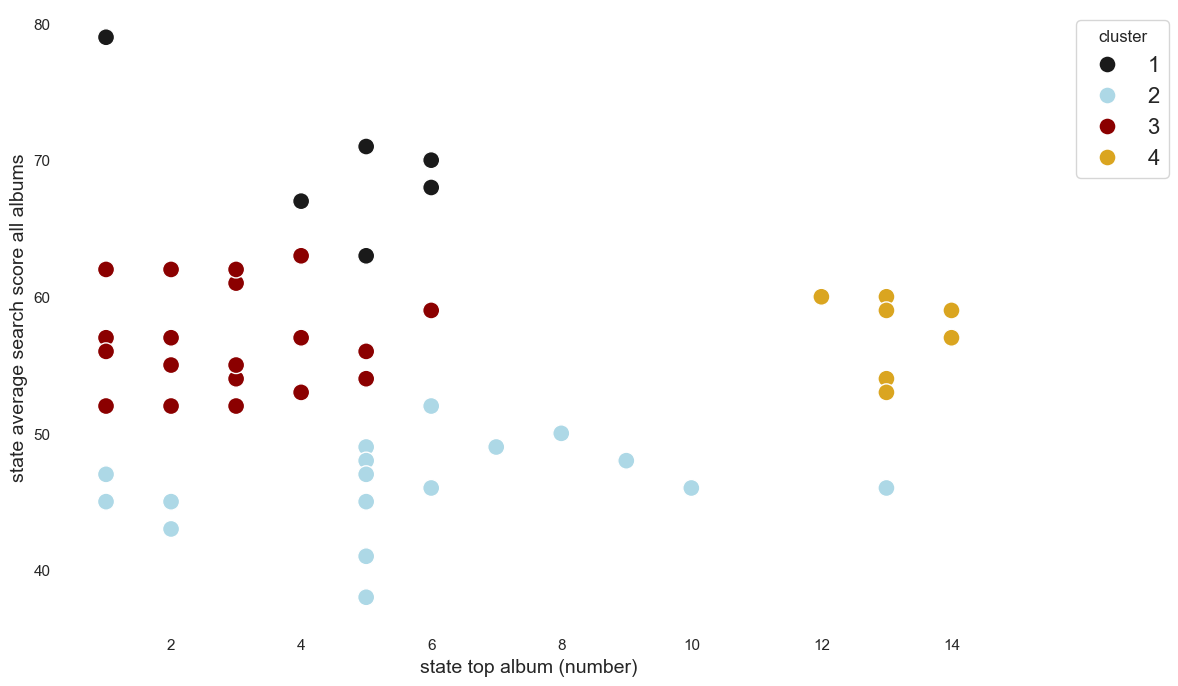

In [96]:
# Compare key variables with other variables and y variable- st_overall_search_avg
# Plot the clusters for the 'top_alb_num' and 'st_overall_search_avg'

plt.figure(figsize=(12,8))
top_alb_num_st_overall_avg_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='top_alb_num', y='st_overall_search_avg', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

top_alb_num_st_overall_avg_clust_scatt.grid(False)
top_alb_num_st_overall_avg_clust_scatt.set_facecolor('#FFFFFF')

plt.xlabel('state top album (number)', fontsize=14) 
plt.ylabel('state average search score all albums', fontsize=14) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

### Observations:
- The red cluster of states has top album number less than 6 (early)
- The black cluster has top albums between 4 and 6
- The light blue cluster has the most spread out top albums
- The yellow cluster by far prefers most recent albums, all 12-14

In [97]:
# Save fig

top_alb_num_st_overall_avg_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'top_alb_num_st_overall_avg_clust_scatt.png'))

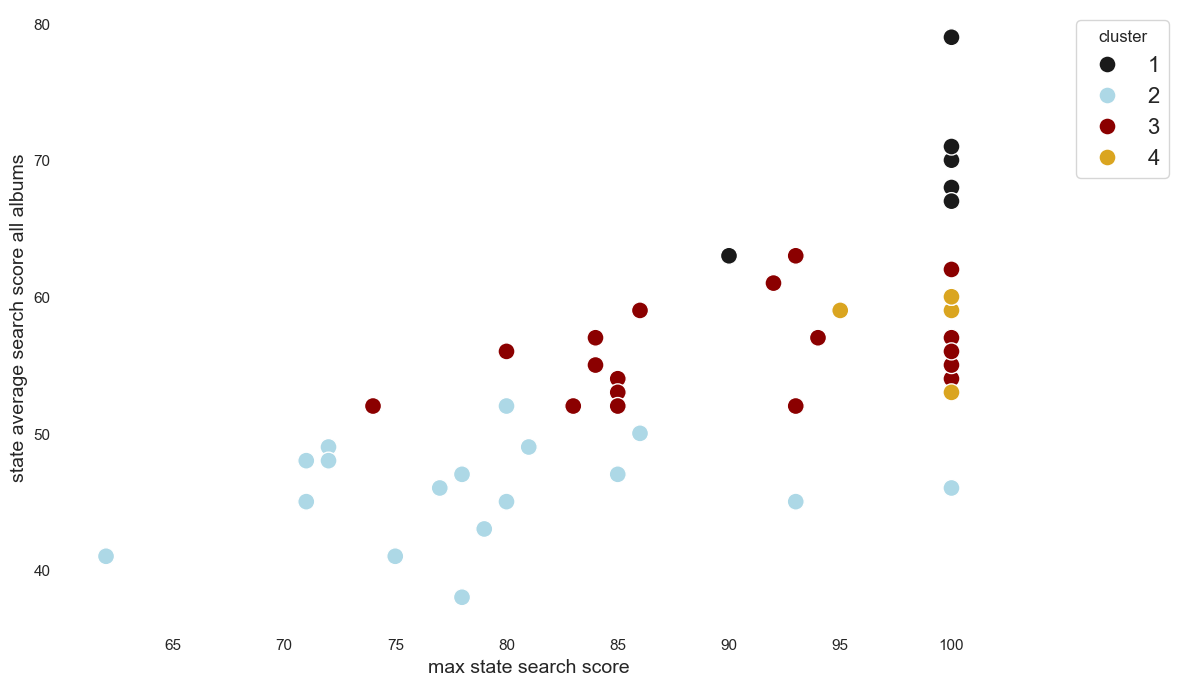

In [98]:
# Compare key variables with other variables and y variable- st_overall_search_avg
# Plot the clusters for the 'max_gsearch_score' and 'st_overall_search_avg'

plt.figure(figsize=(12,8))
max_st_search_score_st_overall_score_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='max_gsearch_score', y='st_overall_search_avg', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

max_st_search_score_st_overall_score_clust_scatt.grid(False)
max_st_search_score_st_overall_score_clust_scatt.set_facecolor('#FFFFFF')

plt.xlabel('max state search score', fontsize=14) 
plt.ylabel('state average search score all albums', fontsize=14) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

### Observations: very interesting!
- Light blue has the lowest max score and has most max scores under 87
- Red has scores 72 to 100
- Yellow and Black have almost all max scores at 100 (this means top search!), and all >90
- Plot skewed left

In [99]:
# Save fig

max_st_search_score_st_overall_score_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'max_st_search_score_st_overall_score_clust_scatt.png'))

In [100]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

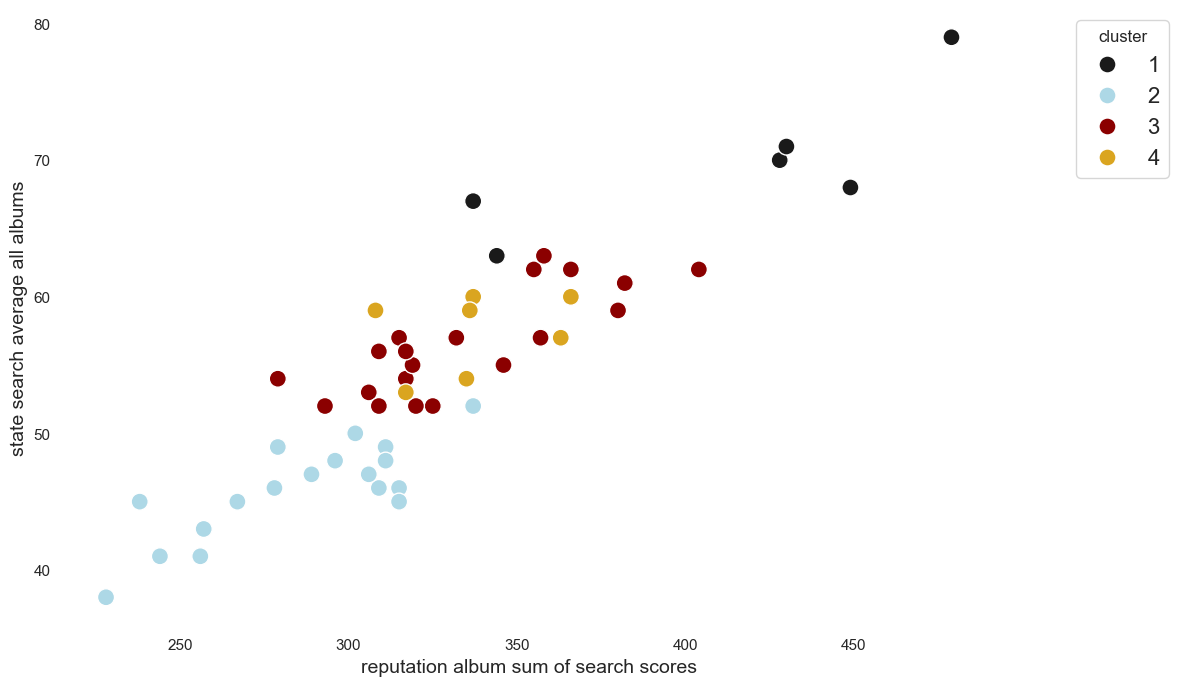

In [101]:
# Compare similar variables: REP total scores and state overall sum

plt.figure(figsize=(12,8))
NAME = sns.scatterplot(data = df_state_segm_pca_kmeans, x='REP_sum', y='st_overall_search_avg', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

NAME.grid(False)
NAME.set_facecolor('#FFFFFF')

plt.xlabel('reputation album sum of search scores', fontsize=14) 
plt.ylabel('state search average all albums', fontsize=14) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

As expected, very similar to the REP average scatter

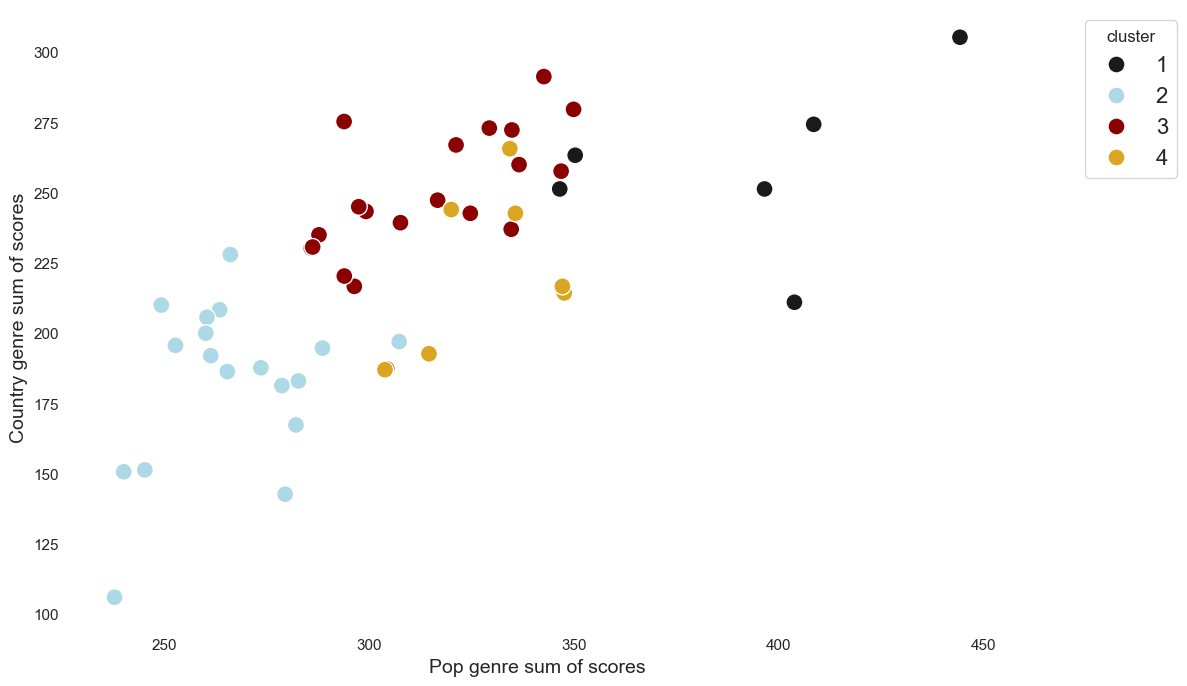

In [102]:
# Compare other variables: POP total scores and COUNTRY total scores
# These scores have been normalized based on the number of periods for each album

plt.figure(figsize=(12,8))
pop_vs_country_sums_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='pop_norm', y='country_norm', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

pop_vs_country_sums_clust_scatt.grid(False)
pop_vs_country_sums_clust_scatt.set_facecolor('#FFFFFF')

plt.xlabel('Pop genre sum of scores', fontsize=14) 
plt.ylabel('Country genre sum of scores', fontsize=14) 
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

Observations:
- Large gap between black and blue cluster's pop scores

In [103]:
# Save fig

pop_vs_country_sums_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'pop_vs_country_sums_clust_scatt.png'))

In [104]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

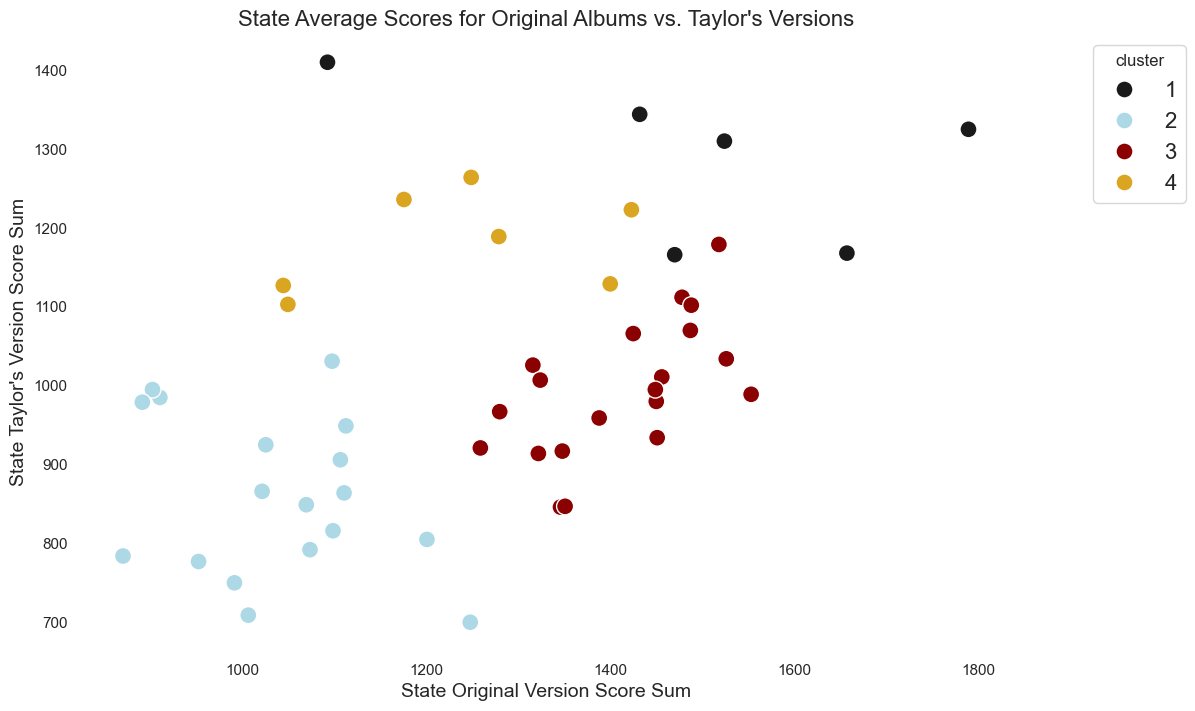

In [105]:
# Compare other variables: taylor's versions vs. originals with matching TV

# This will be a very important chart because it connects to hypotheses and prediction goals! 

plt.figure(figsize=(12,8))
st_tv_vs_originals_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='originals_sum', y='taylorsversions_sum', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

st_tv_vs_originals_clust_scatt.grid(False)
st_tv_vs_originals_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel("State Original Version Score Sum", fontsize=14) 
plt.ylabel("State Taylor's Version Score Sum", fontsize=14)
plt.title("State Average Scores for Original Albums vs. Taylor's Versions", fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

Observations:
- Blue and red both under 1150 for TVs (even though red has a high original score)
- Yellow and black both have above 1150 TV
- Yellow has a high TV with a lower OG, TV preference in search scores

In [106]:
# Save fig

st_tv_vs_originals_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'st_tv_vs_originals_clust_scatt.png'))

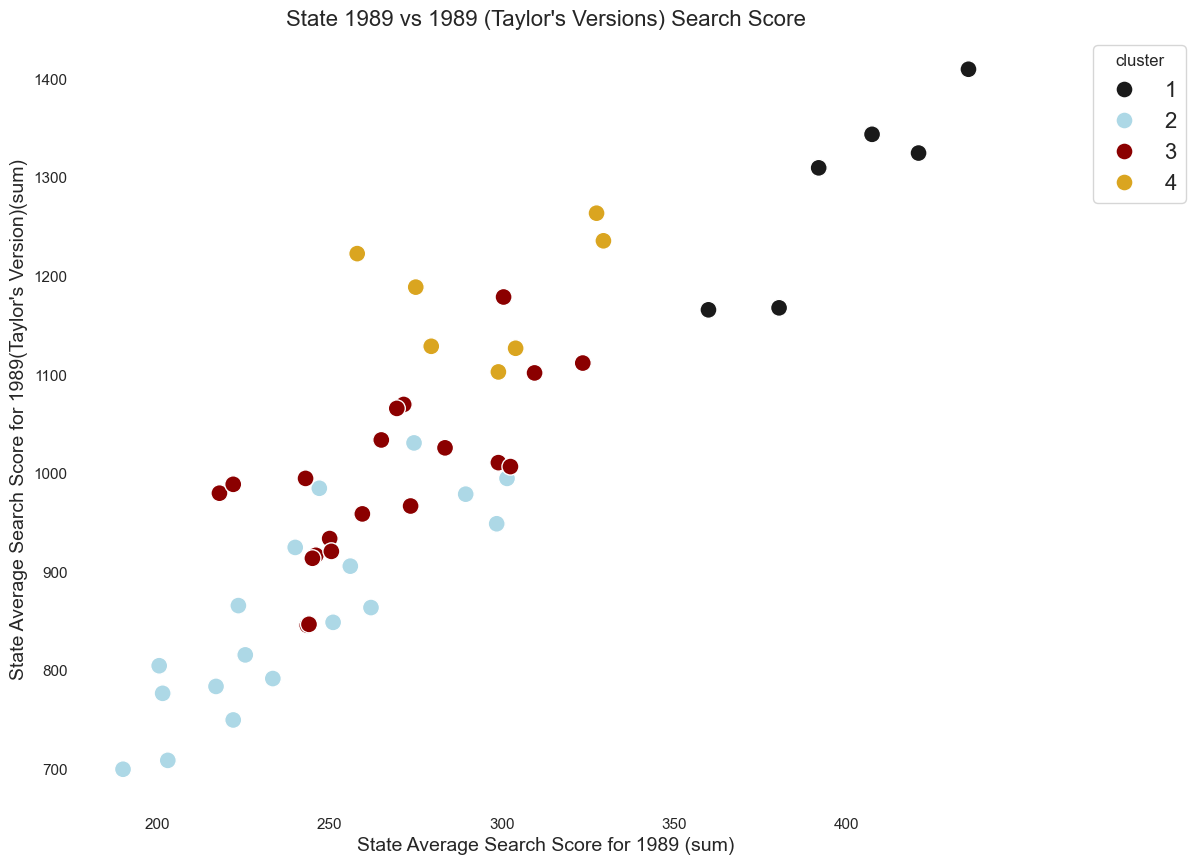

In [107]:
# Compare other variables: alt genre sum vs. taylor's versions

# This will be a very important chart because it connects to hypotheses and prediction goals! 

plt.figure(figsize=(12,10))
st_1989_vs_1989TV_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='alt_norm', y='taylorsversions_sum', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

st_1989_vs_1989TV_clust_scatt.grid(False)
st_1989_vs_1989TV_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel("State Average Search Score for 1989 (sum)", fontsize=14) 
plt.ylabel("State Average Search Score for 1989(Taylor's Version)(sum)", fontsize=14)
plt.title("State 1989 vs 1989 (Taylor's Versions) Search Score", fontsize=16)

legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

- Could help predict sums for REPTV
- This appears to be a strong positive linear relationship. Will run correlations for it
- Clear cluster groupings as well

In [108]:
# Save fig

st_1989_vs_1989TV_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'st_1989_vs_1989TV_clust_scatt.png'))

In [109]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

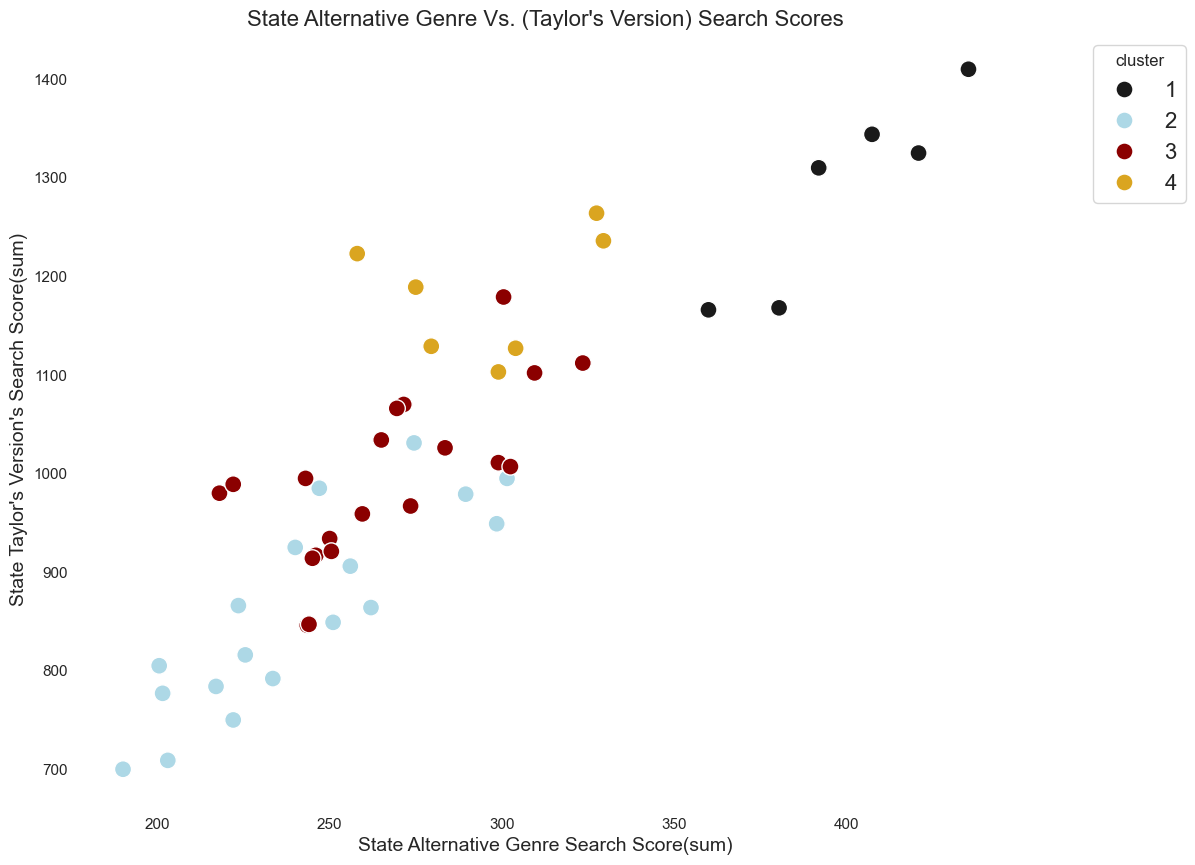

In [110]:
# Compare other variables: 1989 sum vs. 1989TV sum

# This will be a very important chart because it connects to hypotheses and prediction goals! 

plt.figure(figsize=(12,10))
st_alt_vs_tv_sum_clust_scatt = sns.scatterplot(data = df_state_segm_pca_kmeans, x='alt_norm', y='taylorsversions_sum', 
                                                        hue='cluster', hue_order=[1,2,3,4], palette=['k', 'lightblue', 'darkred','goldenrod'], s=150)
 

st_alt_vs_tv_sum_clust_scatt.grid(False)
st_alt_vs_tv_sum_clust_scatt.set_facecolor('#FFFFFF')
plt.xlabel("State Alternative Genre Search Score(sum)", fontsize=14) 
plt.ylabel("State Taylor's Version's Search Score(sum)", fontsize=14)
plt.title("State Alternative Genre Vs. (Taylor's Version) Search Scores", fontsize=16)
legend = plt.legend(bbox_to_anchor=(1.2, 1), title = 'cluster', fontsize=16)
legend.get_frame().set_facecolor('white')

plt.show()

####Observations

This chart relationship came from my own prediction as a Swiftie and based on what I know about fans. It is particularly unique because none of the Taylor's Versions are alt genres, which makes these more independent variables! 

- Shows another strong positive linear relationship, with clear cluster groups! 

In [111]:
# Save fig

st_alt_vs_tv_sum_clust_scatt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'st_alt_vs_tv_sum_clust_scatt.png'))

## Compare K-means cluster statistics for variables in state df

In [112]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster'],
      dtype='object')

In [113]:
# Display full numbers to help compare clusters

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [114]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

In [115]:
# Add color labels

df_state_segm_pca_kmeans.loc[df_state_segm_pca_kmeans['cluster'] == 1, 'cluster_color'] = 'black'
df_state_segm_pca_kmeans.loc[df_state_segm_pca_kmeans['cluster'] == 2, 'cluster_color'] = 'blue'
df_state_segm_pca_kmeans.loc[df_state_segm_pca_kmeans['cluster'] == 3, 'cluster_color'] = 'red'
df_state_segm_pca_kmeans.loc[df_state_segm_pca_kmeans['cluster'] == 4, 'cluster_color'] = "yellow"

C:\Users\leobs\AppData\Local\Temp\ipykernel_6600\2200072109.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_state_segm_pca_kmeans.loc[df_state_segm_pca_kmeans['cluster'] == 1, 'cluster_color'] = 'black'


In [116]:
# Focus on stats for key variables

state_kmeans_stats = df_state_segm_pca_kmeans.groupby('cluster_color').agg({'cluster': ['median'],
                                                                    'st_overall_search_avg': ['mean','median'], 
                                                                      'REP_avg_score': ['mean','median'], 
                                                                      'top_alb_num': ['mean','median'], 
                                                                      'max_gsearch_score': ['mean','median'],
                                                                      'country_norm': ['mean','median'],  
                                                                      'pop_norm': ['mean','median'], 
                                                                      'rock_norm': ['mean','median'],  
                                                                      'alt_norm': ['mean','median'], 
                                                                      'always_ts_sum': ['mean','median'], 
                                                                      'originals_sum': ['mean','median'],  
                                                                      'taylorsversions_sum': ['mean','median'], 
                                                                      'upcoming_sum': ['mean','median'], 
                                                                      'MIDN_avg_score': ['mean','median'],  
                                                                      'MIDN_sum_n': ['mean','median'], 
                                                                      'DEBUT_avg_score': ['mean','median'], 
                                                                      'DEBUT_sum': ['mean','median'], 
                                                                      'FEAR_avg_score': ['mean','median'],  
                                                                      'FEAR_sum': ['mean','median'], 
                                                                      'SPEAK_avg_score': ['mean','median'], 
                                                                      'SPEAK_sum': ['mean','median'], 
                                                                       'RED_avg_score': ['mean','median'],
                                                                      'RED_sum': ['mean','median'], 
                                                                      '1989_avg_score': ['mean','median'], 
                                                                      '1989_sum': ['mean','median'], 
                                                                      'REP_sum': ['mean','median'],
                                                                      'LOVE_avg_score': ['mean','median'], 
                                                                      'LOVE_sum': ['mean','median'], 
                                                                      'FOLK_avg_score': ['mean','median'], 
                                                                      'FOLK_sum': ['mean','median'],
                                                                      'EVER_avg_score': ['mean','median'], 
                                                                      'EVER_sum': ['mean','median'], 
                                                                      'FEARTV_avg_score': ['mean','median'], 
                                                                      'FEARTV_sum': ['mean','median'],
                                                                      'REDTV_avg_score': ['mean','median'], 
                                                                      'REDTV_sum': ['mean','median'], 
                                                                      'SPEAKTV_avg_score': ['mean','median'], 
                                                                      'SPEAKTV_sum': ['mean','median'],
                                                                      '1989TV_avg_score': ['mean','median'], 
                                                                      '1989TV_sum_n': ['mean','median'], 
                                                                      'country_sum': ['mean','median'], 
                                                                      'pop_sum': ['mean','median'],
                                                                      'rock_sum': ['mean','median'], 
                                                                      'alt_sum': ['mean','median'],  
                                                                      'state_num': ['mean','median'], 
                                             })

In [117]:
state_kmeans_stats = state_kmeans_stats.sort_values(by=('cluster', 'median'), ascending=True)

In [118]:
state_kmeans_stats

cluster st_overall_search_avg        REP_avg_score         \
               median                  mean median          mean median   
cluster_color                                                             
black           1.000                69.667 69.000        82.233 85.800   
blue            2.000                45.889 46.000        57.089 58.500   
red             3.000                56.550 56.000        66.890 64.500   
yellow          4.000                57.429 59.000        67.486 67.200   

              top_alb_num        max_gsearch_score         country_norm  \
                     mean median              mean  median         mean   
cluster_color                                                             
black               4.500  5.000            98.333 100.000      259.444   
blue                5.556  5.000            80.000  78.500      182.648   
red                 2.900  3.000            90.900  92.500      247.567   
yellow             13.143 13.000            99.286 100.000      223.286   

                      pop_norm         rock_norm         alt_norm          \
               median     mean  median      mean  median     mean  median   
cluster_color                                                               
black         257.333  391.680 400.195   336.333 336.625  399.417 399.750   
blue          189.833  266.426 264.502   221.403 222.375  240.917 236.750   
red           244.167  314.553 312.227   283.438 281.750  265.975 262.250   
yellow        216.667  329.099 334.390   284.964 285.500  296.071 299.000   

              always_ts_sum          originals_sum           \
                       mean   median          mean   median   
cluster_color                                                 
black              1599.833 1613.500      1494.167 1497.000   
blue                987.389  971.500      1038.778 1048.000   
red                1119.300 1099.500      1410.750 1437.000   
yellow             1202.714 1198.000      1231.714 1249.000   

              taylorsversions_sum          upcoming_sum          \
                             mean   median         mean  median   
cluster_color                                                     
black                    1287.167 1317.500      498.833 489.000   
blue                      860.111  856.500      360.278 358.500   
red                       993.800  992.000      456.350 442.500   
yellow                   1181.571 1189.000      430.571 440.000   

              MIDN_avg_score        MIDN_sum_n         DEBUT_avg_score         \
                        mean median       mean  median            mean median   
cluster_color                                                                   
black                 79.000 80.062    394.500 400.000          17.533 16.800   
blue                  47.764 47.875    238.333 239.000          14.967 15.600   
red                   56.675 55.750    282.950 278.500          24.380 24.200   
yellow                61.482 58.875    306.857 294.000          18.629 16.800   

              DEBUT_sum         FEAR_avg_score        FEAR_sum          \
                   mean  median           mean median     mean  median   
cluster_color                                                            
black            87.667  84.000         58.200 63.900  291.000 319.500   
blue             74.833  78.000         44.811 44.600  224.056 223.000   
red             121.900 121.000         69.670 69.400  348.350 347.000   
yellow           93.143  84.000         55.857 60.600  279.286 303.000   

              SPEAK_avg_score        SPEAK_sum         RED_avg_score         \
                         mean median      mean  median          mean median   
cluster_color                                                                 
black                  73.167 72.200   365.833 361.000        83.400 88.200   
blue                   47.900 50.000   239.500 250.000        56.356 56.200   
red                    67.59

In [119]:
# After running with states above, the medians and means are close enough to only focus on mean (other than cluster)
# This will increase readability

state_kmeans_stats = df_state_segm_pca_kmeans.groupby('cluster_color').agg({'cluster': ['median'],
                                                                     'st_overall_search_avg': ['mean'], 
                                                                      'REP_avg_score': ['mean'], 
                                                                      'top_alb_num': ['mean'], 
                                                                      'max_gsearch_score': ['mean'],
                                                                      'country_norm': ['mean'],
                                                                      'pop_norm': ['mean'], 
                                                                      'rock_norm': ['mean'],
                                                                      'alt_norm':  ['mean'],
                                                                      'always_ts_sum':  ['mean'], 
                                                                      'originals_sum':  ['mean'],  
                                                                      'taylorsversions_sum':  ['mean'],
                                                                      'upcoming_sum':  ['mean'], 
                                                                      'MIDN_avg_score':  ['mean'],  
                                                                      'MIDN_sum_n':  ['mean'], 
                                                                      'DEBUT_avg_score':  ['mean'], 
                                                                      'DEBUT_sum':  ['mean'],
                                                                      'FEAR_avg_score':  ['mean'],  
                                                                      'FEAR_sum':  ['mean'],
                                                                      'SPEAK_avg_score': ['mean'], 
                                                                      'SPEAK_sum':  ['mean'], 
                                                                       'RED_avg_score':  ['mean'],
                                                                      'RED_sum':  ['mean'],
                                                                      '1989_avg_score':  ['mean'],
                                                                      '1989_sum':  ['mean'],
                                                                      'REP_sum':  ['mean'],
                                                                      'LOVE_avg_score':  ['mean'],
                                                                      'LOVE_sum':  ['mean'],
                                                                      'FOLK_avg_score':  ['mean'], 
                                                                      'FOLK_sum':  ['mean'],
                                                                      'EVER_avg_score':  ['mean'], 
                                                                      'EVER_sum':  ['mean'], 
                                                                      'FEARTV_avg_score':  ['mean'], 
                                                                      'FEARTV_sum': ['mean'],
                                                                      'REDTV_avg_score':  ['mean'],
                                                                      'REDTV_sum': ['mean'], 
                                                                      'SPEAKTV_avg_score':  ['mean'],
                                                                      'SPEAKTV_sum':  ['mean'],
                                                                      '1989TV_avg_score':  ['mean'],
                                                                      '1989TV_sum_n':  ['mean'],
                                                                      'country_sum':  ['mean'], 
                                                                      'pop_sum':  ['mean'],
                                                                      'rock_sum':  ['mean'], 
                                                                      'alt_sum':  ['mean'], 
                                                                      'state_num':  ['mean']
                                             })

In [120]:
state_kmeans_stats = state_kmeans_stats.sort_values(by=('cluster', 'median'), ascending=True)

In [121]:
state_kmeans_stats

,cluster,st_overall_search_avg,REP_avg_score,top_alb_num,max_gsearch_score,country_norm,pop_norm,rock_norm,alt_norm,always_ts_sum,originals_sum,taylorsversions_sum,upcoming_sum,MIDN_avg_score,MIDN_sum_n,DEBUT_avg_score,DEBUT_sum,FEAR_avg_score,FEAR_sum,SPEAK_avg_score,SPEAK_sum,RED_avg_score,RED_sum,1989_avg_score,1989_sum,REP_sum,LOVE_avg_score,LOVE_sum,FOLK_avg_score,FOLK_sum,EVER_avg_score,EVER_sum,FEARTV_avg_score,FEARTV_sum,REDTV_avg_score,REDTV_sum,SPEAKTV_avg_score,SPEAKTV_sum,1989TV_avg_score,1989TV_sum_n,country_sum,pop_sum,rock_sum,alt_sum,state_num
,median,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_color,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
black,1.000,69.667,82.233,4.500,98.333,259.444,391.680,336.333,399.417,1599.833,1494.167,1287.167,498.833,79.000,394.500,17.533,87.667,58.200,291.000,73.167,365.833,83.400,417.000,84.067,420.333,411.167,81.300,406.500,77.367,386.833,82.400,412.000,79.933,399.667,80.900,404.500,31.600,158.000,67.792,325.000,778.333,1957.833,1345.333,798.833,25.500
blue,2.000,45.889,57.089,5.556,80.000,182.648,266.426,221.403,240.917,987.389,1038.778,860.111,360.278,47.764,238.333,14.967,74.833,44.811,224.056,47.900,239.500,56.356,281.778,58.689,293.444,285.444,53.444,267.222,46.089,230.444,50.278,251.389,49.811,249.056,49.478,247.389,23.389,116.944,51.500,246.722,547.944,1331.444,885.611,481.833,23.500
red,3.000,56.550,66.890,2.900,90.900,247.567,314.553,283.438,265.975,1119.300,1410.750,993.800,456.350,56.675,282.950,24.380,121.900,69.670,348.350,67.590,337.950,73.150,365.750,71.740,358.700,334.450,60.880,304.400,49.840,249.200,56.550,282.750,54.490,272.450,57.220,286.100,28.790,143.950,60.800,291.300,742.700,1572.250,1133.750,531.950,27.350
yellow,4.000,57.429,67.486,13.143,99.286,223.286,329.099,284.964,296.071,1202.714,1231.714,1181.571,430.571,61.482,306.857,18.629,93.143,55.857,279.286,59.314,296.571,64.229,321.143,66.943,334.714,337.429,60.743,303.714,54.743,273.714,63.686,318.429,59.486,297.429,61.457,307.286,42.971,214.857,75.464,362.000,669.857,1645.000,1139.857,592.143,29.000


# 2D. Key observations: state groups and clustering

## Black (1) cluster
- highest REP and overall search averages
- biggest spread across search scores
- Top albums are 4-6 (RED, 1989, LOVE, FOLK)
- Similar score to yellow for max search score, all above 90 and most at 100(/100)
- higher pop genre score, tied for top country
- Leans NORTHEASTERN states

## Blue (2) cluster
- lowest REP and overall search average
- Very linear REP vs. overall
- Top album spread through her career (1, 2, 5, 6, 7, 8, 9, 10, 13)
- Lowest max search cores, most are under 90
- Lowest pop score
- Low to mid country score
- Leans WEST but states spread throughout regions

## Red (3)
- Middle REP and overall search averages
- Top albums are all under 6 (early work!)
- Max scores are 72-100
- 2nd lowest pop score but highest score for country
- Leans SOUTHERN states

## Yellow (4)
- Middle REP and overall search scores
- All top albums are recent (12-14)
- Similar max search score spread to black cluster
- Middle pop, middle country
- Leans MIDWEST states

## Overall state patterns
- Strong relationship between REP search average and overall search average- will keep a key hypothesis
- There are clear state cluster patterns within this relationship
- There is less of a relationship based on genre rather than ALBUM TYPE within clusters
- Black and blue clusters are the most different across variables
- There are clear distinctions between Taylor's Versions vs. originals
    - Blue and red are under 1150 for TV (even though red has a high original score)
    - Yellow and black have over 1150 for TV (even though yellow has a lower original score)
    - Black has both high original and TV scores

## New trend: alternative score sums vs. taylor's versions correlated (appears linear)
- This is significant since these variables do not overlap in values (no TVs are alternative)
- It is also interesting since none of the TV originals are alternative
- I want to explore this more as a concept of key loyal fanbase vs. general popularity

# Revisit correlations based on finer grains and clustering visuals 

### There are so many linear relationships above, with clear clusters, that I'd like to revisit linear correlation within these cluster groups and state specific dataframe 

## Album df

### Create correlation matrix based on the new album df

In [122]:
df_alb_segm_pca_kmeans.columns

Index(['alb_state_key', 'alb_num', 'album_id', 'state', 'state_num',
       'st_group_alb_search_avg', 'alb_group_st_search_avg', 'alb_r_date',
       'record_type', 'tvflag', 'st_alb_pop_group', 'album_event',
       'alb_track_cnt', 'wk1_sales', 'tot_alb_plays', 'top_s_cnt',
       'alb_streams_norm', 'top_alb_count', 'top_alb_n', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m', 'color', 'alb_genre', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Segment K-means PCA', 'cluster', 'cluster_color'],
      dtype='object')

In [123]:
df_album_cluster_corr_focus = df_alb_segm_pca_kmeans[['alb_num',
                                                   'alb_group_st_search_avg',
                                                      'tvflag','alb_track_cnt', 'wk1_sales', 
                                                      'tot_alb_plays', 'top_s_cnt',
                                                      'alb_streams_norm',
                                                      'alb_r_day', 'speech_m',
                                                      'cluster']]

In [124]:
df_album_cluster_corr_focus.columns

Index(['alb_num', 'alb_group_st_search_avg', 'tvflag', 'alb_track_cnt',
       'wk1_sales', 'tot_alb_plays', 'top_s_cnt', 'alb_streams_norm',
       'alb_r_day', 'speech_m', 'cluster'],
      dtype='object')

In [125]:
df_album_cluster_corr_focus.corr()

,alb_num,alb_group_st_search_avg,tvflag,alb_track_cnt,wk1_sales,tot_alb_plays,top_s_cnt,alb_streams_norm,alb_r_day,speech_m,cluster
alb_num,1.000,0.023,0.706,0.554,0.047,0.165,1.000,0.568,-0.178,0.205,0.413
alb_group_st_search_avg,0.023,1.000,-0.191,0.105,0.607,0.305,0.023,0.081,0.024,0.389,-0.459
tvflag,0.706,-0.191,1.000,0.733,-0.198,-0.288,0.706,0.476,-0.321,-0.281,0.804
alb_track_cnt,0.554,0.105,0.733,1.000,-0.110,0.011,0.554,0.187,-0.193,-0.286,0.607
wk1_sales,0.047,0.607,-0.198,-0.110,1.000,0.041,0.047,0.388,0.354,0.526,-0.421
tot_alb_plays,0.165,0.305,-0.288,0.011,0.041,1.000,0.165,-0.196,0.094,0.584,-0.417
top_s_cnt,1.000,0.023,0.706,0.554,0.047,0.165,1.000,0.568,-0.178,0.205,0.413
alb_streams_norm,0.568,0.081,0.476,0.187,0.388,-0.196,0.568,1.000,0.376,0.117,0.374
alb_r_day,-0.178,0.024,-0.321,-0.193,0.354,0.094,-0.178,0.376,1.000,-0.000,-0.182
speech_m,0.205,0.389,-0.281,-0.286,0.526,0.584,0.205,0.117,-0.000,1.000,-0.568


AttributeError: 'DataFrame' object has no attribute 'figure'

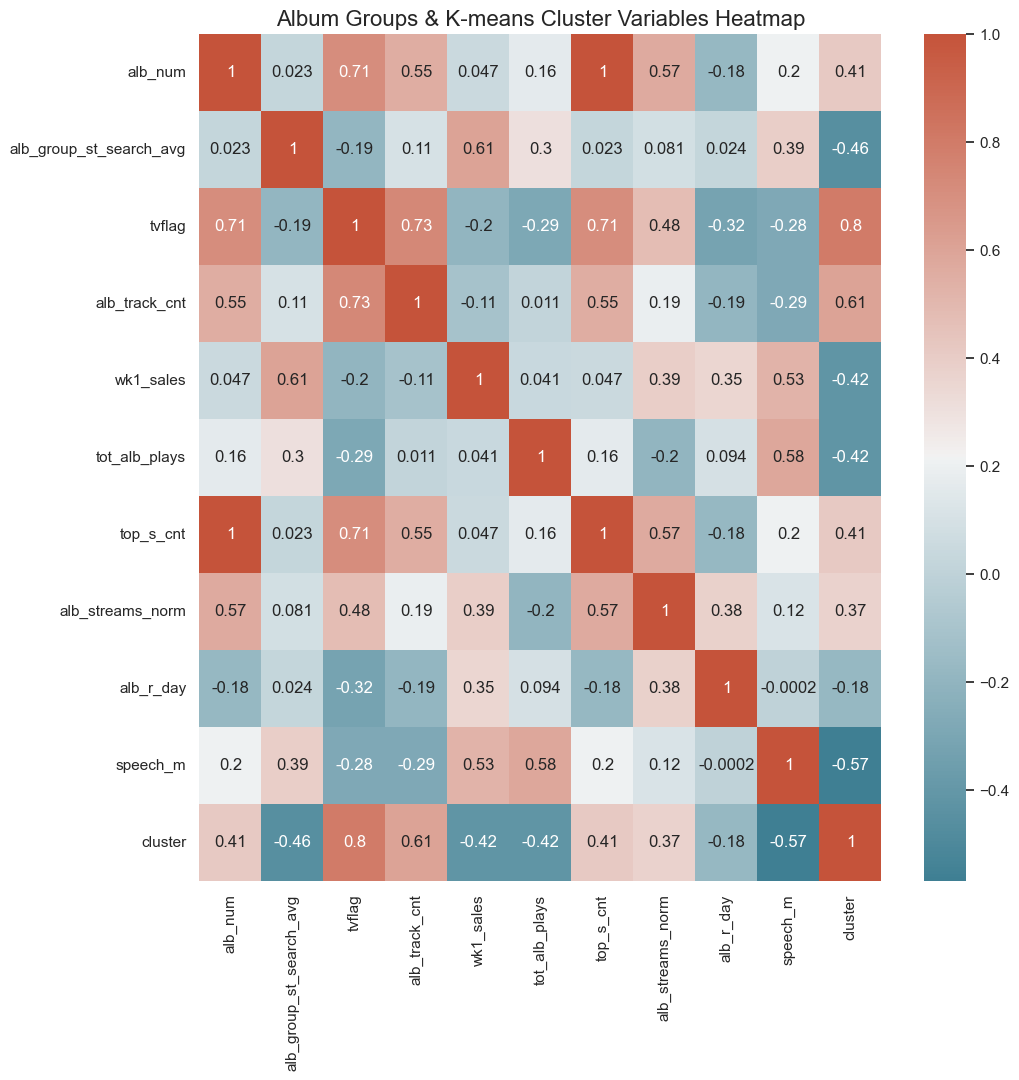

In [126]:
# Create a heatmap with new focus of variables from state groups and clusters

f,ax = plt.subplots(figsize=(11,11))

cmap = sns.diverging_palette(2020, 19, as_cmap=True) 

df_alb_segm_pca_kmeans_focus_heatmap = sns.heatmap(df_album_cluster_corr_focus.corr(), annot = True, cmap=cmap, ax = ax)
plt.title('Album Groups & K-means Cluster Variables Heatmap', fontsize=16)
cb = df_album_cluster_corr_focus.figure.colorbar(heatmap.collections[0])
cb = heatmap.figure.colorbar(heatmap.collections[0])
cb.ax.tick_params(labelsize=14)

plt.show()

## Continued focus: 
- album group state search average and week 1 sales (0.61)


## Added focus:
- tv_flag and top_song_count 0.71
- album streams normalized and album number 1.0!
- album streams normalized and tv flag 0.71
- total album plays and speech_m 0.58 (maybe, but only sound factor)

In [127]:
# Save fig

df_alb_segm_pca_kmeans_focus_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'df_alb_segm_pca_kmeans_focus_heatmap.png'))

## State df correlations

### Create correlation matrix based on the new state df

In [128]:
df_state_segm_pca_kmeans.columns

Index(['state', 'st_overall_search_avg', 'top_alb_num', 'st_top_album',
       'top_alb_num.1', 'max_gsearch_score', 'st_lowest_album',
       'REP_avg_score', 'country_norm', 'pop_norm', 'rock_norm', 'alt_norm',
       'always_ts_sum', 'originals_sum', 'taylorsversions_sum', 'upcoming_sum',
       'MIDN_avg_score', 'MIDN_sum_n', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum', 'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_n', 'country_sum', 'pop_sum',
       'rock_sum', 'alt_sum', 'state_num', 'st_alb_pop_group', 'Component 1',
       'Component 2', 'Component 3', 'Segment K-means PCA', 'cluster',
       'cluster_color'],
      dtype='object')

In [129]:
df_state_cluster_corr_focus = df_state_segm_pca_kmeans[['st_overall_search_avg', 
                                                       'top_alb_num',
                                                        'REP_avg_score', 
                                                        'alt_norm', 'originals_sum',
                                                       '1989_avg_score',
                                                        '1989TV_avg_score',
                                                        'alt_sum','taylorsversions_sum', 
                                                       'upcoming_sum',                                
                                                         'DEBUT_avg_score',
                                                         'max_gsearch_score', 
                                                               'cluster']]

In [130]:
df_state_cluster_corr_focus.columns

Index(['st_overall_search_avg', 'top_alb_num', 'REP_avg_score', 'alt_norm',
       'originals_sum', '1989_avg_score', '1989TV_avg_score', 'alt_sum',
       'taylorsversions_sum', 'upcoming_sum', 'DEBUT_avg_score',
       'max_gsearch_score', 'cluster'],
      dtype='object')

In [131]:
df_state_cluster_corr_focus.corr()

,st_overall_search_avg,top_alb_num,REP_avg_score,alt_norm,originals_sum,1989_avg_score,1989TV_avg_score,alt_sum,taylorsversions_sum,upcoming_sum,DEBUT_avg_score,max_gsearch_score,cluster
st_overall_search_avg,1.000,-0.024,0.896,0.838,0.790,0.805,0.660,0.838,0.880,0.800,0.360,0.657,-0.021
top_alb_num,-0.024,1.000,-0.021,0.165,-0.367,-0.254,0.419,0.165,0.357,-0.226,-0.369,0.205,0.364
REP_avg_score,0.896,-0.021,1.000,0.757,0.631,0.765,0.512,0.757,0.777,0.836,0.304,0.595,-0.088
alt_norm,0.838,0.165,0.757,1.000,0.388,0.579,0.481,1.000,0.873,0.494,-0.011,0.454,-0.274
originals_sum,0.790,-0.367,0.631,0.388,1.000,0.803,0.509,0.388,0.480,0.734,0.550,0.543,0.112
1989_avg_score,0.805,-0.254,0.765,0.579,0.803,1.000,0.434,0.579,0.589,0.665,0.277,0.550,-0.076
1989TV_avg_score,0.660,0.419,0.512,0.481,0.509,0.434,1.000,0.481,0.785,0.435,0.168,0.578,0.373
alt_sum,0.838,0.165,0.757,1.000,0.388,0.579,0.481,1.000,0.873,0.494,-0.011,0.454,-0.274
taylorsversions_sum,0.880,0.357,0.777,0.873,0.480,0.589,0.785,0.873,1.000,0.555,0.072,0.653,0.067
upcoming_sum,0.800,-0.226,0.836,0.494,0.734,0.665,0.435,0.494,0.555,1.000,0.777,0.544,0.086


NameError: name 'df_state_segm_pca_kmeans_focus' is not defined

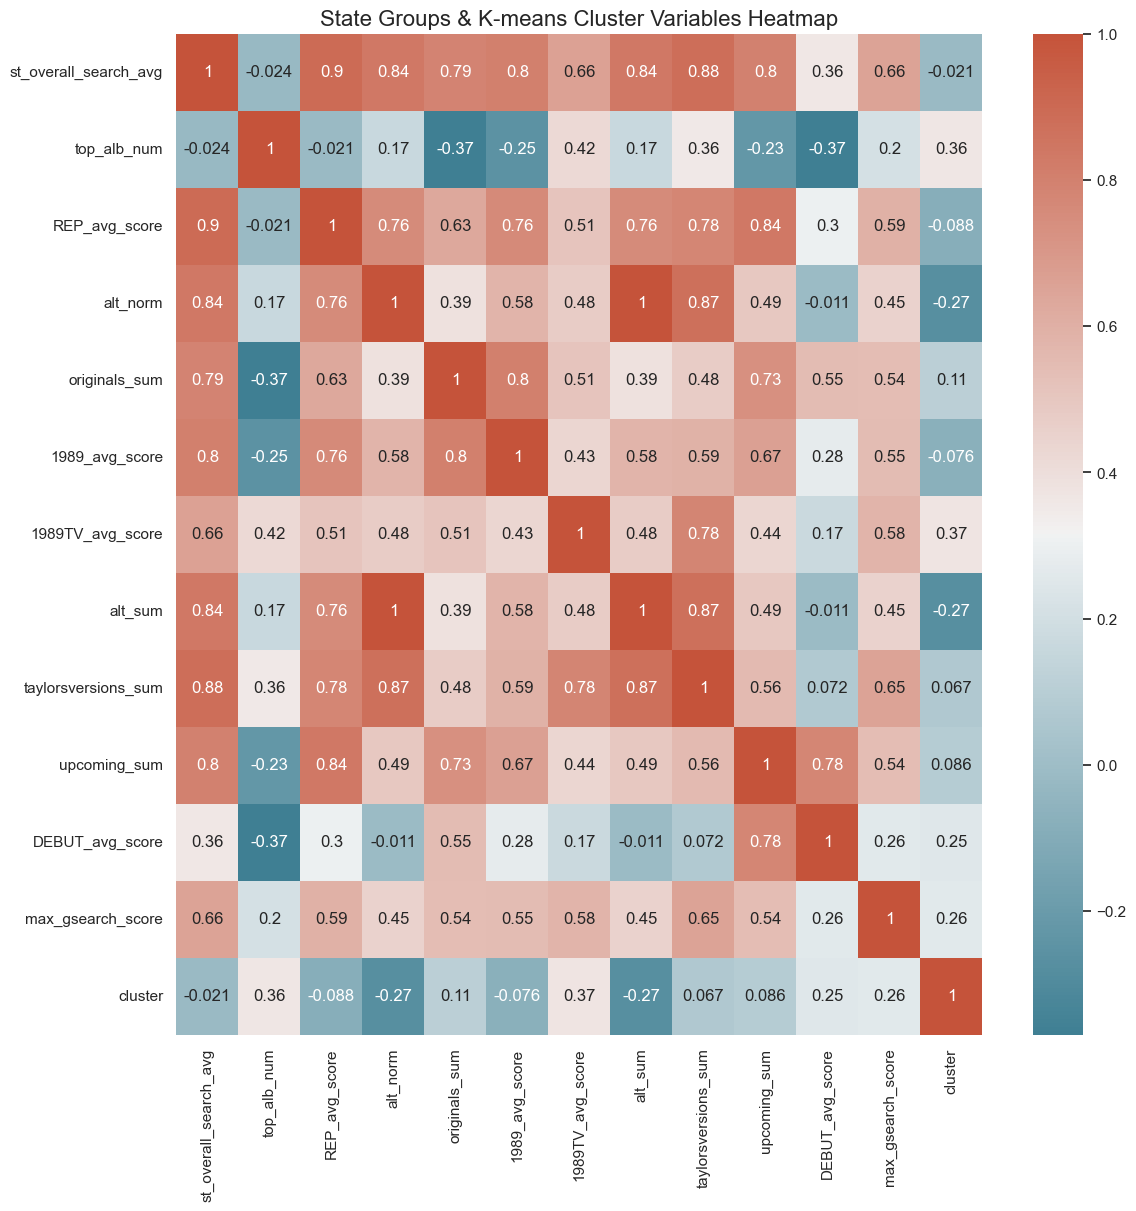

In [135]:
# Create a heatmap with new focus of variables from state groups and clusters

f,ax = plt.subplots(figsize=(13,13))

cmap = sns.diverging_palette(2020, 19, as_cmap=True) 

df_state_segm_pca_kmeans_focus_heatmap = sns.heatmap(df_state_cluster_corr_focus.corr(), annot = True, cmap=cmap, ax = ax)
plt.title('State Groups & K-means Cluster Variables Heatmap', fontsize=16)
cb = df_state_segm_pca_kmeans_focus_heatmap.figure.colorbar(df_state_segm_pca_kmeans_focus.collections[0])
cb.ax.tick_params(labelsize=14)

plt.show()


## Continued focus: 
- state overall search average and REP search average 0.90


## Added focus:
- alternative genre search score sum and taylor's versions search score sum (neat!)
- 1989 search average score and 1989TV search average 0.43-> low considering they are almost the same album! Want to focus on clustering.

In [133]:
# Save fig

df_state_segm_pca_kmeans_focus_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'df_state_segm_pca_kmeans_focus_heatmap.png'))

# Next steps

## Please see observations after each K-means section for a detailed break down of clustering observations. 

## This aspect of the analysis showed how important the data grain is, both in terms of correlation relationships and clustering. An increase in specificity leads to higher accuracy. 

- The dataframe to use for all album aggregates and trends has the grain album-state (14 observations)

- The dataframe to use for all state trends has the data grain state (51 observations)

- The overall dataframe, which I previously used for correlations, should be used for time series analysis and has the data grain alb- periods from release - state (roughly 3600 observations). I can add the state clusters and album grain clusters to this larger data frame, too. 

#### Based on the above, one next step is to re-rerun correlations of interests. I did this for both data frames above


## Continued Correlation focus: 
#### album group state search average and week 1 sales (0.61)
### state overall search average and REP search average 0.90

## Added Correlation focus:
- tv_flag and top_song_count 0.71
- album streams normalized and album number 1.0!
- album streams normalized and tv flag 0.71
- total album plays and speech_m 0.58 (maybe, but only sound factor)
- alternative genre search score sum and taylor's versions search score sum (neat!)
- 1989 search average score and 1989TV search average 0.43-> low considering they are almost the same album! Want to focus on clustering.


## Important lack of relationships (unexpected)
- album group search average and album streams normalized
- week 1 album sales and album streams normalized
- album number and week 1 sales (it's not a higher sales over time- there are non linear patterns)

## Other notes
- There continues to be a lack of relationship between week 1 albums sales vs. normalized streams vs. state search averages. I am particularly interested in normalized spotify streams, especiall
- 1989TV is a major outlier for: 
    week 1 sales and normalized streams
    week 1 sales and top song count
    week 1 sales and album number
   and has less total album streams (due to most newly released), but WAY higher streams normalized
-

## Hypotheses: 
- My original hypothesis that as an album group's state search score average increases, so does week 1 sales, is still the most linear relationship for measures related to week 1 sales. 

###Edit focus: album streams (normalized) has the biggest difference between clusters and can 

- I am continuing my focus on the relationship between REP average state search score and overall search score

### I am curious about more complex hypotheses based on clustering (vs. just 1 variable against another for whole group) and what models I could use for this

### New trend: alternative score sums vs. taylor's versions correlated (appears linear)
- This is significant since these variables do not overlap in values (no TVs are alternative)
- It is also interesting since none of the TV originals are alternative
- I want to explore this more as a concept of key loyal fanbase vs. general popularity

## Questions:
- What unexplored variables play a factor in week 1 sales? 
- What led to 1989TV's huge success? Was the Era's tour a major factor? Was there more marketting? 

## Applications

### One application of the clustering would be to create fan profiles. Even though the state search scores are by state, they could also work to make generalizations about groups of U.S. fans. This could lead to targetting marketting, choosing specific Easter eggs, and monitoring fanbase patterns across time (the clusters are tied to time and album groups)
- There are clear state groupings for google behavior that are tied to multiple key variables (see specific breakdown in observations after state clustering)

### The album clusters are very insightful. There were clear trends with Taylor's versions vs. originals, the impact of reputation album scores, and 1989 vs. 1989TV. 
- Predicting album success based on albums with characteristics based on cluster could be a neat exploration. 
- All Taylor's Versions behave in similar ways for most variables
- The top cluster across week 1 sales, state search scores is the green (RED, 1989, REP, LOVE)
- Since REP and 1989 originals are in the same cluster, 1989 might help predict REP outcomes

### Another step could be to highlight a top album for each success measure (ie which is most streamed vs. top songs etc.


## Categorical variables and other predictive models
- I want to explore associative relationships and/or other categorical relationship algorithms for non numerical data
- I want to create a decision tree that utilizes clustering from both album and state clusters to predict outcomes

## Time series analysis
- Plot to average and total search scores across time: by album, clusters, etc.
- Plot state scores over time in the large dataframe (shows every period for each album release)
- Can chunk this into a chart for each album release or cluster albums


# Data Export

In [136]:
# Export original album scores with updates

df_alb.to_csv(os.path.join(path, '02 Manipulated Data', 'final_album_scores_2.csv'))

In [137]:
# Export original state scores with updates

df_state.to_csv(os.path.join(path, '02 Manipulated Data', 'final_state_scores_2.csv'))

In [138]:
#df after kmeans and pca applied for album, save as the final album scores 3

df_alb_segm_pca_kmeans.to_csv(os.path.join(path, '02 Manipulated Data', 'final_alb_scores_pca_kmeans.csv'))

In [139]:
#df after kmeans and pca applied for states

df_state_segm_pca_kmeans.to_csv(os.path.join(path, '02 Manipulated Data', 'final_state_scores_pca_kmeans.csv'))

In [140]:
# Export stats for album k-means clusters

alb_kmeans_stats.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_kmeans_stats.csv'))

In [141]:
# Export stats for album k-means clusters

state_kmeans_stats.to_csv(os.path.join(path, '02 Manipulated Data', 'state_kmeans_stats.csv'))
